In [5]:
# 모든 분석에 파트너는 공공은 다 뺌

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [9]:
boa2201 = pd.read_excel('/Users/user/Documents/BOA 데이터/boa2201.xlsx')
boa2202 = pd.read_excel('/Users/user/Documents/BOA 데이터/boa2202.xlsx')
boa2203 = pd.read_excel('/Users/user/Documents/BOA 데이터/boa2203.xlsx')
boa2204 = pd.read_excel('/Users/user/Documents/BOA 데이터/boa2204.xlsx')
boa2205 = pd.read_excel('/Users/user/Documents/BOA 데이터/boa2205.xlsx')
boa2206 = pd.read_excel('/Users/user/Documents/BOA 데이터/boa2206.xlsx')
boa2207 = pd.read_excel('/Users/user/Documents/BOA 데이터/boa2207.xlsx')
boa2208 = pd.read_excel('/Users/user/Documents/BOA 데이터/boa2208.xlsx')
boa2209 = pd.read_excel('/Users/user/Documents/BOA 데이터/boa2209.xlsx')
boa2210 = pd.read_excel('/Users/user/Documents/BOA 데이터/boa2210.xlsx')
boa2211 = pd.read_excel('/Users/user/Documents/BOA 데이터/boa2211.xlsx')
boa2212 = pd.read_excel('/Users/user/Documents/BOA 데이터/boa2212.xlsx')
boa2301 = pd.read_excel('/Users/user/Documents/BOA 데이터/boa2301.xlsx')
boa2302 = pd.read_excel('/Users/user/Documents/BOA 데이터/boa2302.xlsx')
boa2303 = pd.read_excel('/Users/user/Documents/BOA 데이터/boa2303.xlsx')
boa2304 = pd.read_excel('/Users/user/Documents/BOA 데이터/boa2304.xlsx')
boa2305 = pd.read_excel('/Users/user/Documents/BOA 데이터/boa2305.xlsx')
boa2306 = pd.read_excel('/Users/user/Documents/BOA 데이터/boa2306.xlsx')
boa2307 = pd.read_excel('/Users/user/Documents/BOA 데이터/boa2307.xlsx')
boa2308 = pd.read_excel('/Users/user/Documents/BOA 데이터/boa2308.xlsx')
boa2309 = pd.read_excel('/Users/user/Documents/BOA 데이터/boa2309.xlsx')
boa2310 = pd.read_excel('/Users/user/Documents/BOA 데이터/boa2310.xlsx')
boa2311 = pd.read_excel('/Users/user/Documents/BOA 데이터/boa2311.xlsx')
boa2312 = pd.read_excel('/Users/user/Documents/BOA 데이터/boa2312.xlsx')
boa2401 = pd.read_excel('/Users/user/Documents/BOA 데이터/boa2401.xlsx')
boa2402 = pd.read_excel('/Users/user/Documents/BOA 데이터/boa2402.xlsx')
boa2403 = pd.read_excel('/Users/user/Documents/BOA 데이터/boa2403.xlsx')
boa2404 = pd.read_excel('/Users/user/Documents/BOA 데이터/boa2404.xlsx')
boa2405 = pd.read_excel('/Users/user/Documents/BOA 데이터/boa2405.xlsx')
boa2406 = pd.read_excel('/Users/user/Documents/BOA 데이터/boa2406.xlsx')
boa2407 = pd.read_excel('/Users/user/Documents/BOA 데이터/boa2407.xlsx')
boa2408 = pd.read_excel('/Users/user/Documents/BOA 데이터/boa2408.xlsx')
boa2409 = pd.read_excel('/Users/user/Documents/BOA 데이터/boa2409.xlsx')
boa2410 = pd.read_excel('/Users/user/Documents/BOA 데이터/boa2410.xlsx')
boa2411 = pd.read_excel('/Users/user/Documents/BOA 데이터/boa2411.xlsx')

In [10]:
boa2410.loc[boa2410['구분3']=='WORKS DRIVE','구분3'] = 'WORKBOX'
boa2410.loc[boa2410['상품명']=='웍스 드라이브 문서 공동 편집','구분3'] = 'NAVER WORKS'

In [75]:
boa = [boa2201, boa2202, boa2203, boa2204, boa2205, boa2206, boa2207, boa2208, boa2209, boa2210, boa2211, boa2212, 
       boa2301, boa2302, boa2303, boa2304, boa2305, boa2306, boa2307, boa2308, boa2309, boa2310, boa2311, boa2312, 
       boa2401, boa2402, boa2403, boa2404, boa2405, boa2406, boa2407, boa2408, boa2409, boa2410, boa2411]

In [77]:
for i in range(0, len(boa)) :
    boa[i]['미터링'] = i

In [79]:
domain_user = pd.read_csv('/Users/user/Documents/진행중 업무/회원번호_usercount 매핑.csv')

In [81]:
works_avg_user = domain_user[domain_user['base_item_id'].str[0:3].isin(['COR'])]['user_count'].mean()
box_avg_user = domain_user[domain_user['base_item_id'].str[0:3].isin(['DRV'])]['user_count'].mean()
place_avg_user = domain_user[domain_user['base_item_id'].str[0:3].isin(['APP','ATT','FIN','PAY'])]['user_count'].mean()

domain_user.loc[domain_user['base_item_id'].str[0:3].isin(['COR']), 'base_item_id'] = 'NAVER WORKS'
domain_user.loc[domain_user['base_item_id'].str[0:3].isin(['DRV']), 'base_item_id'] = 'WORKBOX'
domain_user.loc[domain_user['base_item_id'].str[0:3].isin(['APP', 'ATT', 'FIN', 'PAY']), 'base_item_id'] = 'WORKPLACE'

domain_user = domain_user[['member_no','base_item_id','user_count']]
domain_user.columns = ['회원번호','구분3','user_count']
domain_user = domain_user.dropna(subset=['회원번호'])
domain_user['회원번호'] = domain_user['회원번호'].astype(int)
domain_user['회원번호'] = domain_user['회원번호'].astype(str)
domain_user['user_count'] = domain_user['user_count'].astype(int)
domain_user = domain_user.groupby(['회원번호', '구분3'], as_index=False)['user_count'].mean()

In [83]:
for i in range(0, len(boa)) :
    boa[i]['회원번호'] = boa[i]['회원번호'].astype(str)
    boa[i] = boa[i].merge(domain_user, on=['회원번호','구분3'], how = 'left')
    boa[i].loc[(boa[i]['user_count'].isna()) & (boa[i]['구분3'] == 'NAVER WORKS'), 'user_count'] = works_avg_user
    boa[i].loc[(boa[i]['user_count'].isna()) & (boa[i]['구분3'] == 'WORKBOX'), 'user_count'] = box_avg_user
    boa[i].loc[(boa[i]['user_count'].isna()) & (boa[i]['구분3'] == 'WORKPLACE'), 'user_count'] = place_avg_user 

In [84]:
boa_all = boa[0]
for i in range(1, len(boa)) :
    boa_all = pd.concat([boa_all, boa[i]])
boa_all = boa_all.drop(['상품명','상품명.1','단위사용량'],axis=1)

In [85]:
def preprocessing (df) :
    return df[['회원번호','회원명','구분3','매출금액(당월)','이용금액(당월)','플랫폼','파트너명','채널','미터링','user_count']]

for i in range(0, len(boa)) :
    boa[i] = preprocessing(boa[i])
    boa[i].columns = ['회원번호','회원명','구분3','매출금액(당월)','이용금액(당월)','플랫폼','파트너명','채널','미터링','사용량']

boa_all = preprocessing(boa_all)
boa_all.columns = ['회원번호','회원명','구분3','매출금액(당월)','이용금액(당월)','플랫폼','파트너명','채널','미터링','사용량']

In [86]:
def delete_domain (df) :
    df = df[df['플랫폼']!='공공']
    return df

for i in range(0, len(boa)) :
    boa[i] = delete_domain(boa[i])

boa_all = delete_domain(boa_all)

In [87]:
def get_to_unique (df) :
    df = df.groupby(['회원번호', '구분3']).agg({
        '매출금액(당월)': 'sum',
        '이용금액(당월)': 'sum',
        '회원명': 'first',
        '플랫폼': 'first',
        '파트너명': 'first',
        '채널': 'first',
        '미터링': 'first',
        '사용량':'first'
    }).reset_index()
    return df

for i in range(0, len(boa)) :
    boa[i] = get_to_unique(boa[i])

boa_all = boa_all.groupby(['회원번호', '구분3','미터링']).agg({
        '매출금액(당월)': 'sum',
        '이용금액(당월)': 'sum',
        '회원명': 'first',
        '플랫폼': 'first',
        '파트너명': 'first',
        '채널': 'first',
        '사용량':'first'
    }).reset_index()

In [89]:
boa2 = boa.copy()
boa2_all = boa_all.copy()
def only_paid (df) :
    df = df[df['이용금액(당월)']>0]
    return df

for i in range(0, len(boa)) :
    boa[i] = only_paid(boa[i])

boa_all = only_paid(boa_all)

In [90]:
boa_works = []
for i in range(0, len(boa)) :
    works = boa[i][boa[i]['구분3']=='NAVER WORKS']
    boa_works.append(works)

boa_all_works = boa_all[boa_all['구분3']=='NAVER WORKS']

In [91]:
boa_od = []
boa_pt = []
for i in range(0, len(boa)) :
    a = boa[i][boa[i]['채널']!='파트너 매출']
    boa_od.append(a)
    b = boa[i][boa[i]['채널']=='파트너 매출']
    boa_pt.append(b)

boa_all_od = boa_all[boa_all['채널']!='파트너 매출']
boa_all_pt = boa_all[boa_all['채널']=='파트너 매출']

boa2_od = []
boa2_pt = []
for i in range(0, len(boa2)) :
    a = boa2[i][boa2[i]['채널']!='파트너 매출']
    boa2_od.append(a)
    b = boa2[i][boa2[i]['채널']=='파트너 매출']
    boa2_pt.append(b)

boa2_all_od = boa2_all[boa2_all['채널']!='파트너 매출']
boa2_all_pt = boa2_all[boa2_all['채널']=='파트너 매출']

boa_works_od = []
boa_works_pt = []
for i in range(0, len(boa2)) :
    a = boa_od[i][boa_od[i]['구분3']=='NAVER WORKS']
    boa_works_od.append(a)
    b = boa_pt[i][boa_pt[i]['구분3']=='NAVER WORKS']
    boa_works_pt.append(b)

boa2_works_od = []
boa2_works_pt = []
for i in range(0, len(boa2)) :
    a = boa2_od[i][boa2_od[i]['구분3']=='NAVER WORKS']
    boa2_works_od.append(a)
    b = boa2_pt[i][boa2_pt[i]['구분3']=='NAVER WORKS']
    boa2_works_pt.append(b)


In [92]:
od_1 = []
od_works_1 = []
od_place_1 = []
pt_1 = []
pt_works_1 = []
pt_place_1 = []
od_2 = []
od_works_2 = []
od_place_2 = []
pt_2 = []
pt_works_2 = []
pt_place_2 = []

In [93]:
def cost (df) :
    a1 = df[df['채널'].isin(['온라인 매출','영업 매출','관계사 기타'])]['매출금액(당월)'].sum()
    od_1.append(a1)
    a2 = df[(df['채널'].isin(['온라인 매출','영업 매출','관계사 기타']))&(df['구분3']=='NAVER WORKS')]['매출금액(당월)'].sum()
    od_works_1.append(a2)
    a3 = df[(df['채널'].isin(['온라인 매출','영업 매출','관계사 기타']))&(df['구분3']=='WORKPLACE')]['매출금액(당월)'].sum()
    od_place_1.append(a3)
    b1 = df[df['채널'].isin(['파트너 매출'])]['매출금액(당월)'].sum()
    pt_1.append(b1)
    b2 = df[(df['채널'].isin(['파트너 매출']))&(df['구분3']=='NAVER WORKS')]['매출금액(당월)'].sum()
    pt_works_1.append(b2)
    b3 = df[(df['채널'].isin(['파트너 매출']))&(df['구분3']=='WORKPLACE')]['매출금액(당월)'].sum()
    pt_place_1.append(b3)
    c1 = df[df['채널'].isin(['온라인 매출','영업 매출','관계사 기타'])]['이용금액(당월)'].sum()
    od_2.append(c1)
    c2 = df[(df['채널'].isin(['온라인 매출','영업 매출','관계사 기타']))&(df['구분3']=='NAVER WORKS')]['이용금액(당월)'].sum()
    od_works_2.append(c2)
    c3 = df[(df['채널'].isin(['온라인 매출','영업 매출','관계사 기타']))&(df['구분3']=='WORKPLACE')]['이용금액(당월)'].sum()
    od_place_2.append(c3)
    d1 = df[df['채널'].isin(['파트너 매출'])]['이용금액(당월)'].sum()
    pt_2.append(d1)
    d2 = df[(df['채널'].isin(['파트너 매출']))&(df['구분3']=='NAVER WORKS')]['이용금액(당월)'].sum()
    pt_works_2.append(d2)
    d3 = df[(df['채널'].isin(['파트너 매출']))&(df['구분3']=='WORKPLACE')]['이용금액(당월)'].sum()
    pt_place_2.append(d3)

for i in range(0, len(boa)) :
    cost(boa[i])

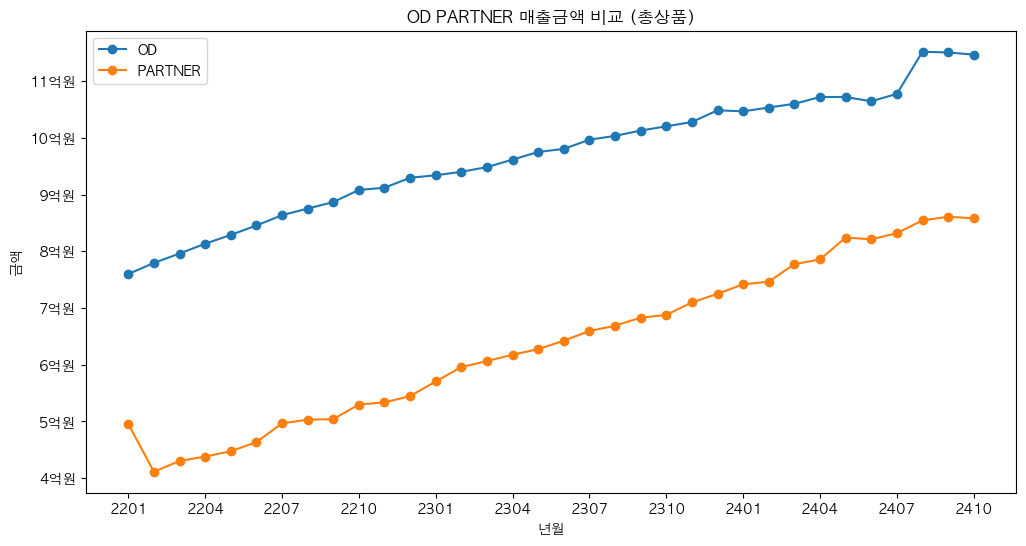

In [94]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'AppleGothic'

fig, ax = plt.subplots(figsize=(12, 6))

x = range(len(od_1))

plt.plot(x, od_1, marker='o', label='OD')
plt.plot(x, pt_1, marker='o', label='PARTNER')

plt.title('OD PARTNER 매출금액 비교 (총상품)')
plt.xlabel('년월')
plt.ylabel('금액')

y_values = [400000000, 500000000, 600000000, 700000000, 800000000, 900000000, 1000000000, 1100000000]
y_labels = ['4억원', '5억원', '6억원', '7억원', '8억원', '9억원', '10억원','11억원']
plt.yticks(y_values, y_labels)

x_ticks_positions = range(0, len(od_1), 3)
x_labels = ['2201', '2204', '2207', '2210', '2301', '2304', '2307', '2310', '2401', '2404', '2407', '2410']
plt.xticks(x_ticks_positions, x_labels)

plt.legend()

plt.show()

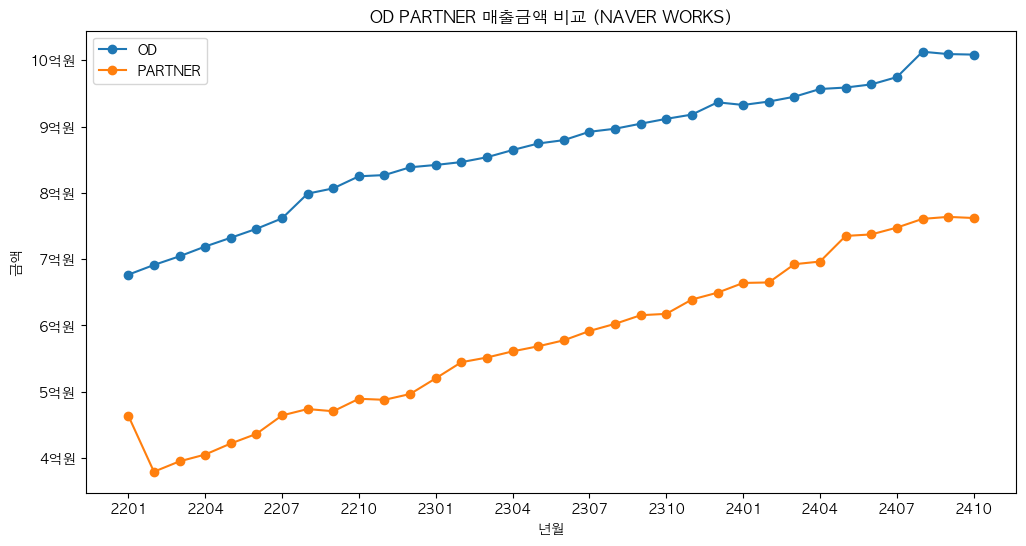

In [95]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'AppleGothic'

fig, ax = plt.subplots(figsize=(12, 6))

x = range(len(od_1))

plt.plot(x, od_works_1, marker='o', label='OD')
plt.plot(x, pt_works_1, marker='o', label='PARTNER')

plt.title('OD PARTNER 매출금액 비교 (NAVER WORKS)')
plt.xlabel('년월')
plt.ylabel('금액')

y_values = [400000000, 500000000, 600000000, 700000000, 800000000, 900000000, 1000000000]
y_labels = ['4억원', '5억원', '6억원', '7억원', '8억원', '9억원','10억원']
plt.yticks(y_values, y_labels)

x_ticks_positions = range(0, len(od_1), 3)
x_labels = ['2201', '2204', '2207', '2210', '2301', '2304', '2307', '2310', '2401', '2404', '2407', '2410']
plt.xticks(x_ticks_positions, x_labels)

plt.legend()

plt.show()

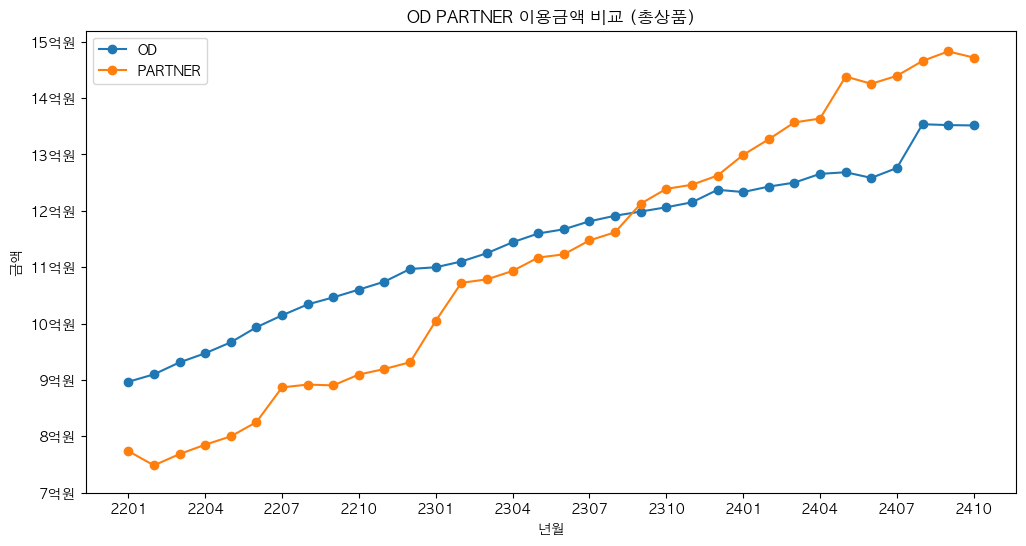

In [96]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'AppleGothic'

fig, ax = plt.subplots(figsize=(12, 6))

x = range(len(od_2))

plt.plot(x, od_2, marker='o', label='OD')
plt.plot(x, pt_2, marker='o', label='PARTNER')

plt.title('OD PARTNER 이용금액 비교 (총상품)')
plt.xlabel('년월')
plt.ylabel('금액')

y_values = [700000000, 800000000, 900000000, 1000000000, 1100000000, 1200000000, 1300000000, 1400000000, 1500000000]
y_labels = ['7억원', '8억원', '9억원', '10억원', '11억원', '12억원', '13억원', '14억원','15억원']
plt.yticks(y_values, y_labels)

x_ticks_positions = range(0, len(od_1), 3)
x_labels = ['2201', '2204', '2207', '2210', '2301', '2304', '2307', '2310', '2401', '2404', '2407', '2410']
plt.xticks(x_ticks_positions, x_labels)

plt.legend()

plt.show()

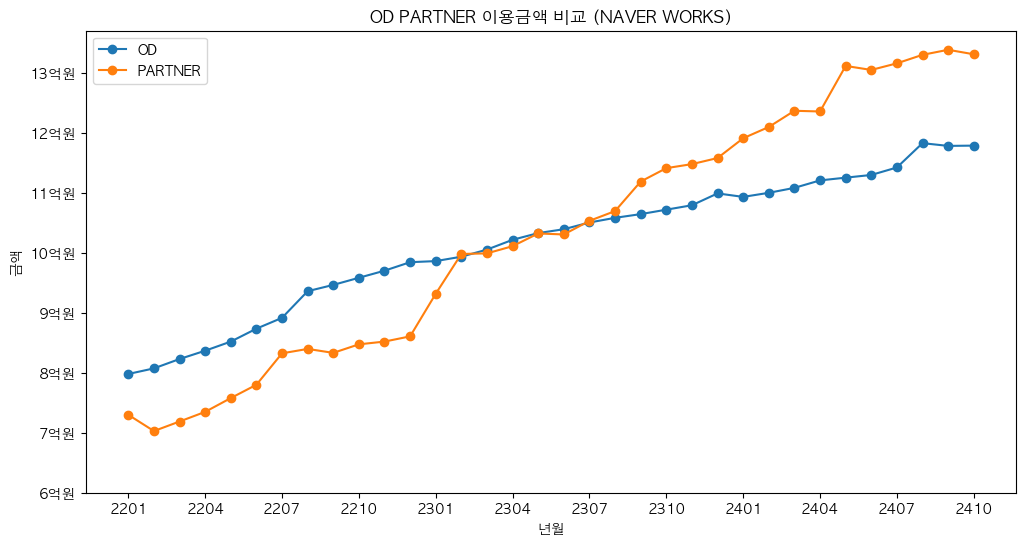

In [97]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'AppleGothic'

fig, ax = plt.subplots(figsize=(12, 6))

x = range(len(od_2))

plt.plot(x, od_works_2, marker='o', label='OD')
plt.plot(x, pt_works_2, marker='o', label='PARTNER')

plt.title('OD PARTNER 이용금액 비교 (NAVER WORKS)')
plt.xlabel('년월')
plt.ylabel('금액')

y_values = [600000000, 700000000, 800000000, 900000000, 1000000000, 1100000000, 1200000000, 1300000000]
y_labels = ['6억원', '7억원', '8억원', '9억원', '10억원', '11억원', '12억원', '13억원']
plt.yticks(y_values, y_labels)

x_ticks_positions = range(0, len(od_1), 3)
x_labels = ['2201', '2204', '2207', '2210', '2301', '2304', '2307', '2310', '2401', '2404', '2407', '2410']
plt.xticks(x_ticks_positions, x_labels)

plt.legend()

plt.show()


In [100]:
# 미터링 정렬로 신규 이탈 추출
boa2_all = boa2_all.sort_values(by = ['회원번호','구분3','미터링'])
boa_first = boa2_all.drop_duplicates(subset = ['회원번호','구분3'], keep = 'first')
boa_last = boa2_all.drop_duplicates(subset = ['회원번호','구분3'], keep = 'last')

# 신규
od_list_new = []
od_list_new_count = []
od_list_new_user_count = []
for i in range(1,len(boa)) :
    a = boa_first[boa_first['미터링']==i]
    a = a[a['채널']!='파트너 매출']
    od_list_new.append(a)
    od_list_new_count.append(len(a))
    od_list_new_user_count.append(a['사용량'].sum())

pt_list_new = []
pt_list_new_count = []
pt_list_new_user_count = []
for i in range(1,len(boa)) :
    a = boa_first[boa_first['미터링']==i]
    a = a[a['채널']=='파트너 매출']
    pt_list_new.append(a)
    pt_list_new_count.append(len(a))
    pt_list_new_user_count.append(a['사용량'].sum())

od_works_list_new = []
od_works_list_new_count = []
od_works_list_new_user_count = []
for i in range(1,len(boa)) :
    a = boa_first[boa_first['미터링']==i]
    a = a[a['채널']!='파트너 매출']
    a = a[a['구분3']=='NAVER WORKS']
    od_works_list_new.append(a)
    od_works_list_new_count.append(len(a))
    od_works_list_new_user_count.append(a['사용량'].sum())

pt_works_list_new = []
pt_works_list_new_count = []
pt_works_list_new_user_count = []
for i in range(1,len(boa)) :
    a = boa_first[boa_first['미터링']==i]
    a = a[a['채널']=='파트너 매출']
    a = a[a['구분3']=='NAVER WORKS']
    pt_works_list_new.append(a)
    pt_works_list_new_count.append(len(a))
    pt_works_list_new_user_count.append(a['사용량'].sum())

# 이탈
od_list_churn = []
od_list_churn_count = []
od_list_churn_user_count = []
for i in range(1,len(boa)) :
    a = boa_last[boa_last['미터링']==i-1]
    a = a[a['채널']!='파트너 매출']
    od_list_churn.append(a)
    od_list_churn_count.append(len(a))
    od_list_churn_user_count.append(a['사용량'].sum())

pt_list_churn = []
pt_list_churn_count = []
pt_list_churn_user_count = []
for i in range(1,len(boa)) :
    a = boa_last[boa_last['미터링']==i-1]
    a = a[a['채널']=='파트너 매출']
    pt_list_churn.append(a)
    pt_list_churn_count.append(len(a))
    pt_list_churn_user_count.append(a['사용량'].sum())

od_works_list_churn = []
od_works_list_churn_count = []
od_works_list_churn_user_count = []
for i in range(1,len(boa)) :
    a = boa_last[boa_last['미터링']==i-1]
    a = a[a['채널']!='파트너 매출']
    a = a[a['구분3']=='NAVER WORKS']
    od_works_list_churn.append(a)
    od_works_list_churn_count.append(len(a))
    od_works_list_churn_user_count.append(a['사용량'].sum())

pt_works_list_churn = []
pt_works_list_churn_count = []
pt_works_list_churn_user_count = []
for i in range(1,len(boa)) :
    a = boa_last[boa_last['미터링']==i-1]
    a = a[a['채널']=='파트너 매출']
    a = a[a['구분3']=='NAVER WORKS']
    pt_works_list_churn.append(a)
    pt_works_list_churn_count.append(len(a))
    pt_works_list_churn_user_count.append(a['사용량'].sum())

In [101]:
#신규인입
od_list_new = []
od_list_new_count = []
od_list_new_user_count = []
for i in range(0, len(boa)-1) :
    boa2_od[i]['회원번호'] = boa2_od[i]['회원번호'].astype(str)
    boa2_od[i+1]['회원번호'] = boa2_od[i+1]['회원번호'].astype(str)
    a = boa2_od[i+1].merge(boa2_od[i], on=['회원번호', '구분3'], how='left', indicator='merge_flag1')
    a = a[a['merge_flag1'] == 'left_only']
    od_list_new.append(a)
    od_list_new_count.append(len(a))
    od_list_new_user_count.append(a['사용량_x'].sum())

pt_list_new = []
pt_list_new_count = []
pt_list_new_user_count = []
for i in range(0, len(boa)-1) :
    boa2_pt[i]['회원번호'] = boa2_pt[i]['회원번호'].astype(str)
    boa2_pt[i+1]['회원번호'] = boa2_pt[i+1]['회원번호'].astype(str)
    a = boa2_pt[i+1].merge(boa2_pt[i], on=['회원번호', '구분3'], how='left', indicator='merge_flag1')
    a = a[a['merge_flag1'] == 'left_only']
    pt_list_new.append(a)
    pt_list_new_count.append(len(a))
    pt_list_new_user_count.append(a['사용량_x'].sum())

od_works_list_new = []
od_works_list_new_count = []
od_works_list_new_user_count = []
for i in range(0, len(boa)-1) :
    boa2_works_od[i]['회원번호'] = boa2_works_od[i]['회원번호'].astype(str)
    boa2_works_od[i+1]['회원번호'] = boa2_works_od[i+1]['회원번호'].astype(str)
    a = boa2_works_od[i+1].merge(boa2_works_od[i], on=['회원번호', '구분3'], how='left', indicator='merge_flag1')
    a = a[a['merge_flag1'] == 'left_only']
    a = a[a['구분3']=='NAVER WORKS']
    od_works_list_new.append(a)
    od_works_list_new_count.append(len(a))
    od_works_list_new_user_count.append(a['사용량_x'].sum())

pt_works_list_new = []
pt_works_list_new_count = []
pt_works_list_new_user_count = []
for i in range(0, len(boa)-1) :
    boa2_works_pt[i]['회원번호'] = boa2_works_pt[i]['회원번호'].astype(str)
    boa2_works_pt[i+1]['회원번호'] = boa2_works_pt[i+1]['회원번호'].astype(str)
    a = boa2_works_pt[i+1].merge(boa2_works_pt[i], on=['회원번호', '구분3'], how='left', indicator='merge_flag1')
    a = a[a['merge_flag1'] == 'left_only']
    a = a[a['구분3']=='NAVER WORKS']
    pt_works_list_new.append(a)
    pt_works_list_new_count.append(len(a))
    pt_works_list_new_user_count.append(a['사용량_x'].sum())

/var/folders/yj/y3b7nzyn7zv0l9bkqtj_37g40000gn/T/ipykernel_66642/1387288582.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boa2_od[i]['회원번호'] = boa2_od[i]['회원번호'].astype(str)
/var/folders/yj/y3b7nzyn7zv0l9bkqtj_37g40000gn/T/ipykernel_66642/1387288582.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boa2_od[i+1]['회원번호'] = boa2_od[i+1]['회원번호'].astype(str)
/var/folders/yj/y3b7nzyn7zv0l9bkqtj_37g40000gn/T/ipykernel_66642/1387288582.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

In [103]:
#탈퇴
od_list_churn = []
od_list_churn_count = []
od_list_churn_user_count = []
for i in range(0, len(boa)-1) :
    a = boa2_od[i].merge(boa2_od[i+1], on=['회원번호', '구분3'], how='left', indicator='merge_flag2')
    a = a[a['merge_flag2'] == 'left_only']
    od_list_churn.append(a)
    od_list_churn_count.append(len(a))
    od_list_churn_user_count.append(a['사용량_x'].sum())

pt_list_churn = []
pt_list_churn_count = []
pt_list_churn_user_count = []
for i in range(0, len(boa)-1) :
    a = boa2_pt[i].merge(boa2_pt[i+1], on=['회원번호', '구분3'], how='left', indicator='merge_flag2')
    a = a[a['merge_flag2'] == 'left_only']
    pt_list_churn.append(a)
    pt_list_churn_count.append(len(a))
    pt_list_churn_user_count.append(a['사용량_x'].sum())

od_works_list_churn = []
od_works_list_churn_count = []
od_works_list_churn_user_count = []
for i in range(0, len(boa)-1) :
    a = boa2_od[i].merge(boa2_works_od[i+1], on=['회원번호', '구분3'], how='left', indicator='merge_flag2')
    a = a[a['merge_flag2'] == 'left_only']
    od_works_list_churn.append(a)
    od_works_list_churn_count.append(len(a))
    od_works_list_churn_user_count.append(a['사용량_x'].sum())

pt_works_list_churn = []
pt_works_list_churn_count = []
pt_works_list_churn_user_count = []
for i in range(0, len(boa)-1) :
    a = boa2_pt[i].merge(boa2_works_pt[i+1], on=['회원번호', '구분3'], how='left', indicator='merge_flag2')
    a = a[a['merge_flag2'] == 'left_only']
    pt_works_list_churn.append(a)
    pt_works_list_churn_count.append(len(a))
    pt_works_list_churn_user_count.append(a['사용량_x'].sum())

In [104]:
# 현재이탈율
od_list_out_now = []
od_list_out_now_ratio = []
for i in range(0, len(boa)-1) :
    a = od_list_new[i].merge(boa2_od[33], on=['회원번호', '구분3'], how='left', indicator='merge_flag3')
    a = a[a['merge_flag3'] == 'left_only']
    od_list_out_now.append(a)
    if od_list_new_count[i] == 0:
        od_list_out_now_ratio.append(0)
    else:
        od_list_out_now_ratio.append(len(a) / od_list_new_count[i])

pt_list_out_now = []
pt_list_out_now_ratio = []
for i in range(0, len(boa)-1) :
    a = pt_list_new[i].merge(boa2_pt[33], on=['회원번호', '구분3'], how='left', indicator='merge_flag3')
    a = a[a['merge_flag3'] == 'left_only']
    pt_list_out_now.append(a)
    if pt_list_new_count[i] == 0:
        pt_list_out_now_ratio.append(0)
    else:
        pt_list_out_now_ratio.append(len(a) / pt_list_new_count[i])

od_works_list_out_now = []
od_works_list_out_now_ratio = []
for i in range(0, len(boa)-1) :
    a = od_works_list_new[i].merge(boa2_works_od[33], on=['회원번호', '구분3'], how='left', indicator='merge_flag3')
    a = a[a['merge_flag3'] == 'left_only']
    od_works_list_out_now.append(a)
    if od_works_list_new_count[i] == 0:
        od_works_list_out_now_ratio.append(0)
    else:
        od_works_list_out_now_ratio.append(len(a) / od_works_list_new_count[i])

pt_works_list_out_now = []
pt_works_list_out_now_ratio = []
for i in range(0, len(boa)-1) :
    a = pt_works_list_new[i].merge(boa2_works_pt[33], on=['회원번호', '구분3'], how='left', indicator='merge_flag3')
    a = a[a['merge_flag3'] == 'left_only']
    pt_works_list_out_now.append(a)
    if pt_works_list_new_count[i] == 0:
        pt_works_list_out_now_ratio.append(0)
    else:
        pt_works_list_out_now_ratio.append(len(a) / pt_works_list_new_count[i])

In [105]:
od_summary = pd.DataFrame([od_list_new_count, od_list_churn_count, od_list_out_now_ratio, od_list_new_user_count, od_list_churn_user_count]).T
od_summary.columns = ['신규(DOMAIN)','이탈(DOMAIN)','현재이탈율','신규(USER TOTAL)','이탈(USER TOTAL)']
date_range = pd.date_range(start='2022-02-01', end='2024-10-31', freq='MS').strftime('%Y년 %m월')
od_summary.index = date_range
od_summary

,신규(DOMAIN),이탈(DOMAIN),현재이탈율,신규(USER TOTAL),이탈(USER TOTAL)
2022년 02월,537.0,183.0,0.391061,7098.473742,3573.001628
2022년 03월,506.0,215.0,0.359684,6684.963271,4002.388120
2022년 04월,445.0,195.0,0.462921,6436.088465,4133.039657
2022년 05월,478.0,215.0,0.462343,6441.583806,4885.022591
2022년 06월,479.0,220.0,0.442589,6377.479532,4155.616765
2022년 07월,477.0,254.0,0.429769,6572.860067,6105.238209
2022년 08월,623.0,238.0,0.353130,10852.642056,5255.562886
2022년 09월,520.0,247.0,0.405769,6867.970588,5664.156339
2022년 10월,536.0,239.0,0.401119,8345.057753,4849.490436
2022년 11월,695.0,258.0,0.448921,8981.209271,5672.782875


In [106]:
pt_summary = pd.DataFrame([pt_list_new_count, pt_list_churn_count, pt_list_out_now_ratio, pt_list_new_user_count, pt_list_churn_user_count]).T
pt_summary.columns = ['신규(DOMAIN)','이탈(DOMAIN)','현재이탈율','신규(USER TOTAL)','이탈(USER TOTAL)']
date_range = pd.date_range(start='2022-02-01', end='2024-10-31', freq='MS').strftime('%Y년 %m월')
pt_summary.index = date_range
pt_summary

,신규(DOMAIN),이탈(DOMAIN),현재이탈율,신규(USER TOTAL),이탈(USER TOTAL)
2022년 02월,70.0,59.0,0.428571,1411.677199,898.365302
2022년 03월,103.0,46.0,0.300971,3617.854708,682.472195
2022년 04월,137.0,56.0,0.233577,4359.559898,1390.346092
2022년 05월,163.0,70.0,0.325153,3978.495610,968.871795
2022년 06월,153.0,68.0,0.372549,3727.456963,912.269045
2022년 07월,147.0,55.0,0.306122,5936.315875,993.615261
2022년 08월,185.0,51.0,0.232432,5482.852358,1307.730584
2022년 09월,150.0,56.0,0.246667,4033.113097,826.517046
2022년 10월,139.0,54.0,0.294964,2557.136388,1254.064041
2022년 11월,153.0,71.0,0.366013,2735.521127,923.252082


In [107]:
od_works_summary = pd.DataFrame([od_works_list_new_count, od_works_list_churn_count, od_works_list_out_now_ratio, od_works_list_new_user_count, od_works_list_churn_user_count]).T
od_works_summary.columns = ['신규(DOMAIN)','이탈(DOMAIN)','현재이탈율','신규(USER TOTAL)','이탈(USER TOTAL)']
date_range = pd.date_range(start='2022-02-01', end='2024-10-31', freq='MS').strftime('%Y년 %m월')
od_works_summary.index = date_range
od_works_summary

,신규(DOMAIN),이탈(DOMAIN),현재이탈율,신규(USER TOTAL),이탈(USER TOTAL)
2022년 02월,455.0,981.0,0.380220,5530.487179,21686.297893
2022년 03월,433.0,1063.0,0.353349,5398.179487,23006.077699
2022년 04월,388.0,1090.0,0.443299,4908.871795,23789.447723
2022년 05월,408.0,1127.0,0.453431,4868.692308,24919.240121
2022년 06월,404.0,1175.0,0.430693,4640.871795,25076.083387
2022년 07월,404.0,1254.0,0.415842,5135.589744,27913.689743
2022년 08월,553.0,1271.0,0.343580,9246.897436,27265.542370
2022년 09월,436.0,1312.0,0.366972,5004.615385,28046.954874
2022년 10월,462.0,1352.0,0.374459,5793.589744,28217.153738
2022년 11월,592.0,1412.0,0.420608,6789.282051,30760.003106


In [108]:
pt_works_summary = pd.DataFrame([pt_works_list_new_count, pt_works_list_churn_count, pt_works_list_out_now_ratio, pt_works_list_new_user_count, pt_works_list_churn_user_count]).T
pt_works_summary.columns = ['신규(DOMAIN)','이탈(DOMAIN)','현재이탈율','신규(USER TOTAL)','이탈(USER TOTAL)']
date_range = pd.date_range(start='2022-02-01', end='2024-10-31', freq='MS').strftime('%Y년 %m월')
pt_works_summary.index = date_range
pt_works_summary

,신규(DOMAIN),이탈(DOMAIN),현재이탈율,신규(USER TOTAL),이탈(USER TOTAL)
2022년 02월,61.0,164.0,0.426230,1230.948718,7756.667450
2022년 03월,88.0,156.0,0.306818,2830.769231,7660.722936
2022년 04월,122.0,176.0,0.254098,3393.948718,8746.208014
2022년 05월,140.0,199.0,0.342857,3208.461538,9122.344897
2022년 06월,133.0,214.0,0.368421,3116.000000,9689.353327
2022년 07월,120.0,214.0,0.291667,4160.384615,10117.207911
2022년 08월,158.0,233.0,0.234177,3565.564103,11896.831602
2022년 09월,130.0,254.0,0.253846,2886.384615,13084.261069
2022년 10월,115.0,271.0,0.269565,1676.205128,14627.062248
2022년 11월,131.0,303.0,0.374046,1960.538462,14944.621774


In [109]:
# DataFrame을 이미지로 저장하는 함수
def save_dataframe_with_index_as_image(df, filepath):
    # 인덱스를 포함한 DataFrame 준비
    df_with_index = df.copy()
    df_with_index.insert(0, '년/월', df_with_index.index)

    # 테이블 생성
    fig, ax = plt.subplots(figsize=(8, len(df_with_index) * 0.5))  # 크기 조정
    ax.axis('tight')
    ax.axis('off')

    # DataFrame을 테이블로 추가
    table = ax.table(
        cellText=df_with_index.values,
        colLabels=df_with_index.columns,
        cellLoc='center',
        loc='center'
    )
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.auto_set_column_width(col=list(range(len(df_with_index.columns) + 1)))

    # 이미지 저장
    plt.savefig(filepath, bbox_inches='tight', dpi=300)
    plt.close(fig)  # 리소스 해제
    
# 이미지 저장 경로
image_path = "/Users/user/Documents/업무문서/dataframe_image1.png"

# 함수 호출
save_dataframe_with_index_as_image(od_summary, image_path)
print(f"DataFrame 이미지 저장 완료: {image_path}")

# 이미지 저장 경로
image_path = "/Users/user/Documents/업무문서/dataframe_image2.png"

# 함수 호출
save_dataframe_with_index_as_image(pt_summary, image_path)
print(f"DataFrame 이미지 저장 완료: {image_path}")

# 이미지 저장 경로
image_path = "/Users/user/Documents/업무문서/dataframe_image3.png"

# 함수 호출
save_dataframe_with_index_as_image(od_works_summary, image_path)
print(f"DataFrame 이미지 저장 완료: {image_path}")

# 이미지 저장 경로
image_path = "/Users/user/Documents/업무문서/dataframe_image4.png"

# 함수 호출
save_dataframe_with_index_as_image(pt_works_summary, image_path)
print(f"DataFrame 이미지 저장 완료: {image_path}")


DataFrame 이미지 저장 완료: /Users/user/Documents/업무문서/dataframe_image1.png
DataFrame 이미지 저장 완료: /Users/user/Documents/업무문서/dataframe_image2.png
DataFrame 이미지 저장 완료: /Users/user/Documents/업무문서/dataframe_image3.png
DataFrame 이미지 저장 완료: /Users/user/Documents/업무문서/dataframe_image4.png


In [111]:
od_cohort = []
for i in range(0, len(boa)-1) :
    month = []
    j = [1,3,6,12,24]
    for k in j:
        if ((i+k)>32) :
            break
        a = od_list_new[i].merge(boa2_od[i+k+1], on=['회원번호', '구분3'], how='left', indicator='merge_flag')
        a = a[a['merge_flag'] == 'left_only']
        if od_list_new_count[i] == 0:
            month.append(0)
        else:
            month.append(len(a)/od_list_new_count[i])
    od_cohort.append(month)

pt_cohort = []
for i in range(0, len(boa)-1) :
    month = []
    j = [1,3,6,12,24]
    for k in j:
        if ((i+k)>32) :
            break
        a = pt_list_new[i].merge(boa2_pt[i+k+1], on=['회원번호', '구분3'], how='left', indicator='merge_flag')
        a = a[a['merge_flag'] == 'left_only']
        if pt_list_new_count[i] == 0:
            month.append(0)
        else:
            month.append(len(a)/pt_list_new_count[i])
    pt_cohort.append(month)

od_works_cohort = []
for i in range(0, len(boa)-1) :
    month = []
    j = [1,3,6,12,24]
    for k in j:
        if ((i+k)>32) :
            break
        a = od_works_list_new[i].merge(boa2_works_od[i+k+1], on=['회원번호', '구분3'], how='left', indicator='merge_flag')
        a = a[a['merge_flag'] == 'left_only']
        if od_works_list_new_count[i] == 0:
            month.append(0)
        else:
            month.append(len(a)/od_works_list_new_count[i])
    od_works_cohort.append(month)

pt_works_cohort = []
for i in range(0, len(boa)-1) :
    month = []
    j = [1,3,6,12,24]
    for k in j:
        if ((i+k)>32) :
            break
        a = pt_works_list_new[i].merge(boa2_works_pt[i+k+1], on=['회원번호', '구분3'], how='left', indicator='merge_flag')
        a = a[a['merge_flag'] == 'left_only']
        if pt_works_list_new_count[i] == 0:
            month.append(0)
        else:
            month.append(len(a)/pt_works_list_new_count[i])
    pt_works_cohort.append(month)

In [113]:
import numpy as np

for i in range(len(od_cohort)):
    while len(od_cohort[i]) < 5:
        od_cohort[i].append(np.nan)
        pt_cohort[i].append(np.nan)
        od_works_cohort[i].append(np.nan)
        pt_works_cohort[i].append(np.nan)

In [115]:
od_cohort = pd.DataFrame(od_cohort)
od_list_out_now_ratio = pd.DataFrame(od_list_out_now_ratio)
od_cohort = pd.concat([od_cohort, od_list_out_now_ratio], axis=1)
od_cohort.columns = ['1개월 후','3개월 후','6개월 후','12개월 후','24개월 후','현재',]
date_range = pd.date_range(start='2022-02-01', end='2024-10-31', freq='MS').strftime('%Y년 %m월')
od_cohort.index = date_range

pt_cohort = pd.DataFrame(pt_cohort)
pt_list_out_now_ratio = pd.DataFrame(pt_list_out_now_ratio)
pt_cohort = pd.concat([pt_cohort, pt_list_out_now_ratio], axis=1)
pt_cohort.columns = ['1개월 후','3개월 후','6개월 후','12개월 후','24개월 후','현재']
date_range = pd.date_range(start='2022-02-01', end='2024-10-31', freq='MS').strftime('%Y년 %m월')
pt_cohort.index = date_range

od_works_cohort = pd.DataFrame(od_works_cohort)
od_works_list_out_now_ratio = pd.DataFrame(od_works_list_out_now_ratio)
od_works_cohort = pd.concat([od_works_cohort, od_works_list_out_now_ratio], axis=1)
od_works_cohort.columns = ['1개월 후','3개월 후','6개월 후','12개월 후','24개월 후','현재']
date_range = pd.date_range(start='2022-02-01', end='2024-10-31', freq='MS').strftime('%Y년 %m월')
od_works_cohort.index = date_range

pt_works_cohort = pd.DataFrame(pt_works_cohort)
pt_works_list_out_now_ratio = pd.DataFrame(pt_works_list_out_now_ratio)
pt_works_cohort = pd.concat([pt_works_cohort, pt_works_list_out_now_ratio], axis=1)
pt_works_cohort.columns = ['1개월 후','3개월 후','6개월 후','12개월 후','24개월 후','현재']
date_range = pd.date_range(start='2022-02-01', end='2024-10-31', freq='MS').strftime('%Y년 %m월')
pt_works_cohort.index = date_range

In [116]:
od_cohort

,1개월 후,3개월 후,6개월 후,12개월 후,24개월 후,현재
2022년 02월,0.108007,0.137803,0.173184,0.201117,0.327747,0.391061
2022년 03월,0.090909,0.136364,0.162055,0.179842,0.322134,0.359684
2022년 04월,0.125843,0.168539,0.206742,0.298876,0.415730,0.462921
2022년 05월,0.144351,0.221757,0.251046,0.230126,0.412134,0.462343
2022년 06월,0.139875,0.217119,0.275574,0.273486,0.419624,0.442589
2022년 07월,0.113208,0.174004,0.226415,0.245283,0.415094,0.429769
2022년 08월,0.078652,0.123596,0.174960,0.231140,0.332263,0.353130
2022년 09월,0.103846,0.178846,0.242308,0.307692,0.388462,0.405769
2022년 10월,0.098881,0.192164,0.266791,0.324627,0.401119,0.401119
2022년 11월,0.102158,0.169784,0.293525,0.359712,NaN,0.448921


In [117]:
pt_cohort

,1개월 후,3개월 후,6개월 후,12개월 후,24개월 후,현재
2022년 02월,0.528571,0.600000,0.185714,0.257143,0.314286,0.428571
2022년 03월,0.436893,0.436893,0.067961,0.097087,0.213592,0.300971
2022년 04월,0.430657,0.445255,0.102190,0.131387,0.204380,0.233577
2022년 05월,0.325153,0.343558,0.042945,0.092025,0.220859,0.325153
2022년 06월,0.267974,0.287582,0.058824,0.124183,0.261438,0.372549
2022년 07월,0.224490,0.251701,0.054422,0.122449,0.238095,0.306122
2022년 08월,0.221622,0.227027,0.059459,0.135135,0.216216,0.232432
2022년 09월,0.246667,0.273333,0.033333,0.100000,0.233333,0.246667
2022년 10월,0.388489,0.381295,0.050360,0.143885,0.294964,0.294964
2022년 11월,0.359477,0.379085,0.091503,0.228758,NaN,0.366013


In [118]:
od_works_cohort

,1개월 후,3개월 후,6개월 후,12개월 후,24개월 후,현재
2022년 02월,0.109890,0.129670,0.162637,0.182418,0.314286,0.380220
2022년 03월,0.099307,0.129330,0.154734,0.166282,0.314088,0.353349
2022년 04월,0.131443,0.167526,0.206186,0.280928,0.391753,0.443299
2022년 05월,0.154412,0.215686,0.252451,0.215686,0.411765,0.453431
2022년 06월,0.150990,0.210396,0.267327,0.250000,0.418317,0.430693
2022년 07월,0.116337,0.168317,0.222772,0.222772,0.403465,0.415842
2022년 08월,0.083183,0.119349,0.166365,0.222423,0.321881,0.343580
2022년 09월,0.098624,0.151376,0.206422,0.270642,0.353211,0.366972
2022년 10월,0.110390,0.181818,0.242424,0.296537,0.374459,0.374459
2022년 11월,0.104730,0.160473,0.268581,0.326014,NaN,0.420608


In [121]:
pt_works_cohort

,1개월 후,3개월 후,6개월 후,12개월 후,24개월 후,현재
2022년 02월,0.557377,0.639344,0.163934,0.229508,0.311475,0.426230
2022년 03월,0.465909,0.477273,0.068182,0.102273,0.215909,0.306818
2022년 04월,0.442623,0.459016,0.106557,0.139344,0.221311,0.254098
2022년 05월,0.335714,0.357143,0.035714,0.085714,0.228571,0.342857
2022년 06월,0.270677,0.293233,0.052632,0.120301,0.255639,0.368421
2022년 07월,0.266667,0.291667,0.058333,0.108333,0.225000,0.291667
2022년 08월,0.215190,0.221519,0.056962,0.126582,0.215190,0.234177
2022년 09월,0.284615,0.307692,0.030769,0.100000,0.238462,0.253846
2022년 10월,0.426087,0.434783,0.026087,0.113043,0.269565,0.269565
2022년 11월,0.381679,0.412214,0.091603,0.229008,NaN,0.374046


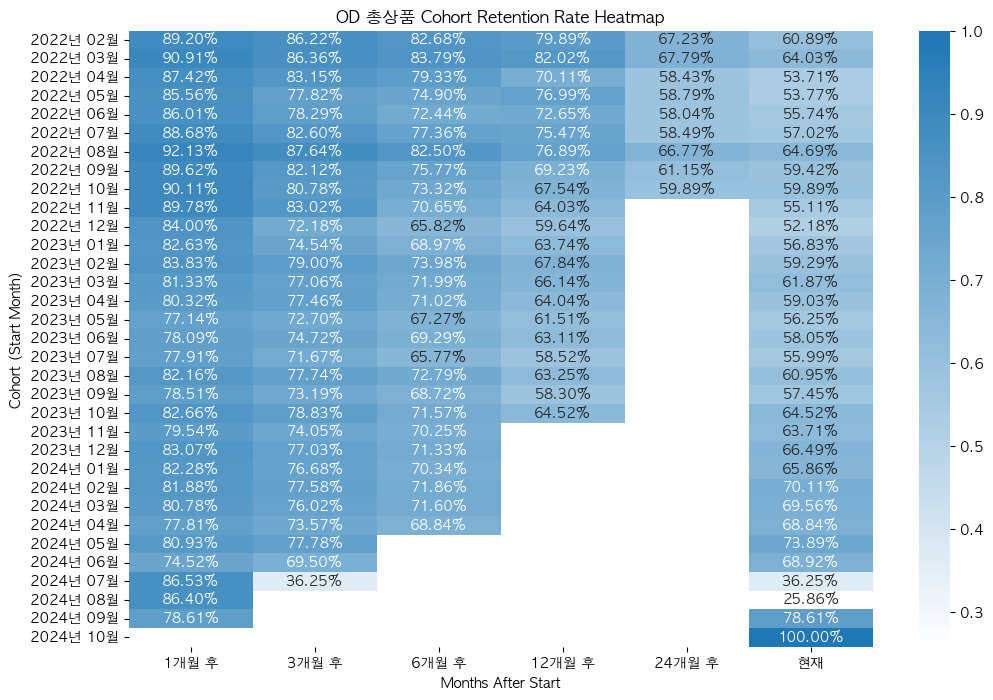

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

default_blue = '#1f77b4'
cmap = mcolors.LinearSegmentedColormap.from_list("default_blue_cmap", ["white", default_blue])

plt.figure(figsize=(12, 8))
sns.heatmap(data=1-od_cohort, annot=True, fmt=".2%", cmap=cmap)
plt.title('OD 총상품 Cohort Retention Rate Heatmap')
plt.ylabel('Cohort (Start Month)')
plt.xlabel('Months After Start')
plt.show()

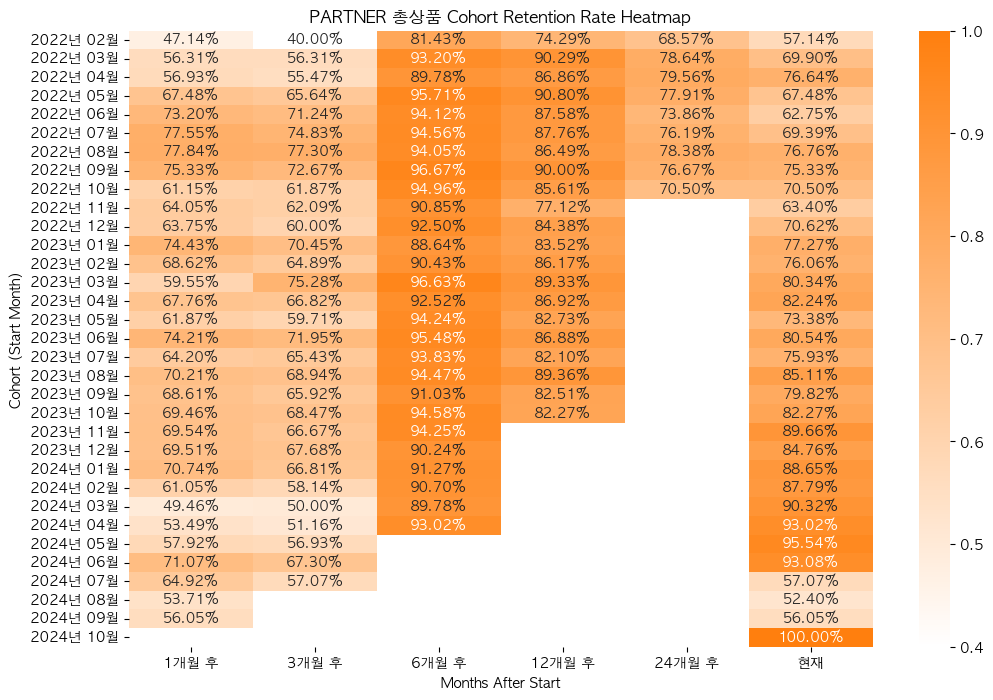

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

default_orange = '#ff7f0e'
cmap = mcolors.LinearSegmentedColormap.from_list("default_orange_cmap", ["white", default_orange])

plt.figure(figsize=(12, 8))
sns.heatmap(data=1-pt_cohort, annot=True, fmt=".2%", cmap=cmap)
plt.title('PARTNER 총상품 Cohort Retention Rate Heatmap')
plt.ylabel('Cohort (Start Month)')
plt.xlabel('Months After Start')
plt.show()

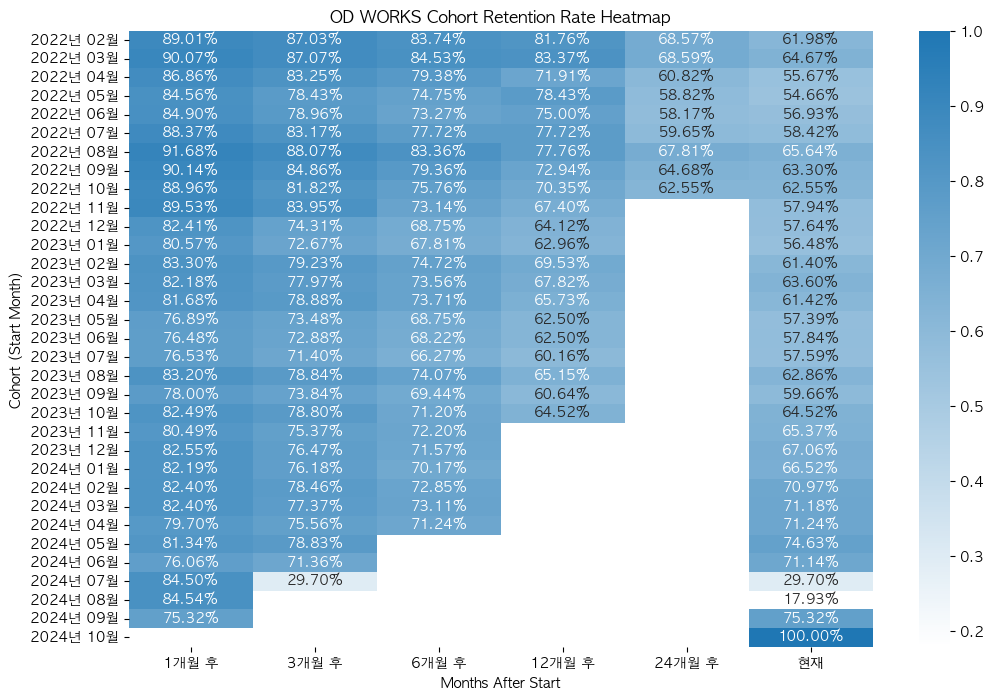

In [126]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

default_blue = '#1f77b4'
cmap = mcolors.LinearSegmentedColormap.from_list("default_blue_cmap", ["white", default_blue])

plt.figure(figsize=(12, 8))
sns.heatmap(data=1-od_works_cohort, annot=True, fmt=".2%", cmap=cmap)
plt.title('OD WORKS Cohort Retention Rate Heatmap')
plt.ylabel('Cohort (Start Month)')
plt.xlabel('Months After Start')
plt.show()

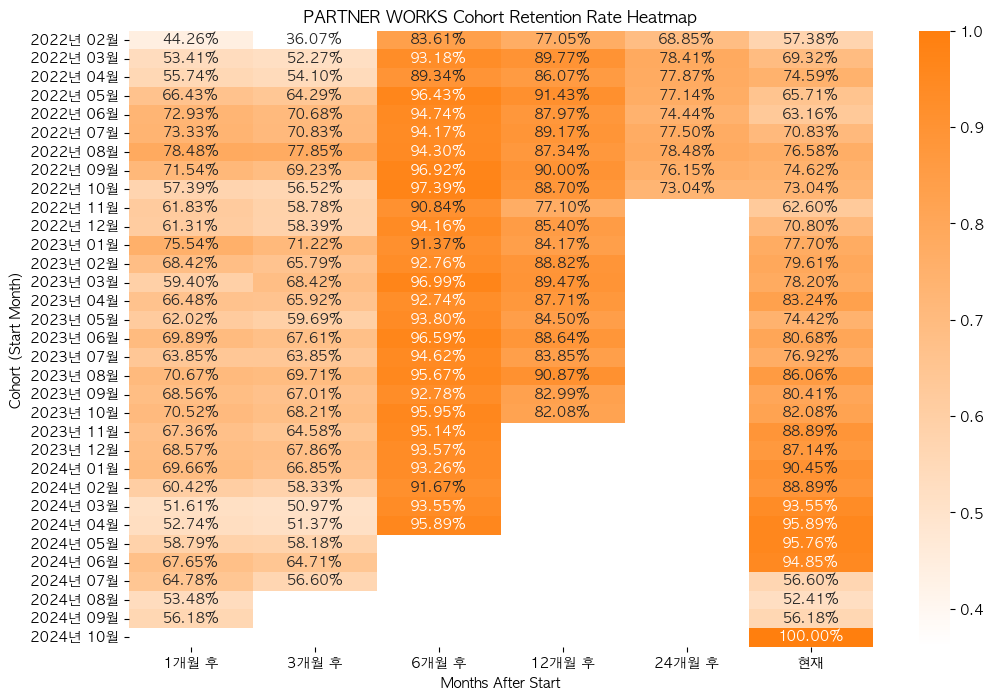

In [129]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

default_orange = '#ff7f0e'
cmap = mcolors.LinearSegmentedColormap.from_list("default_orange_cmap", ["white", default_orange])

plt.figure(figsize=(12, 8))
sns.heatmap(data=1-pt_works_cohort, annot=True, fmt=".2%", cmap=cmap)
plt.title('PARTNER WORKS Cohort Retention Rate Heatmap')
plt.ylabel('Cohort (Start Month)')
plt.xlabel('Months After Start')
plt.show()


In [131]:
#list_new[0].to_excel('/Users/user/Documents/업무문서/2110new.xlsx', index=False)
#list_new[3].to_excel('/Users/user/Documents/업무문서/2201new.xlsx', index=False)

In [132]:
od_summer_out_now = []
od_summer_retention = []
od_summer_new22 = pd.concat([od_list_new[5],od_list_new[6], od_list_new[7], od_list_new[8]])
od_summer_new23 = pd.concat([od_list_new[17],od_list_new[18], od_list_new[19], od_list_new[20]])
od_summer_new24 = pd.concat([od_list_new[29],od_list_new[30], od_list_new[31], od_list_new[32]])

c = od_summer_new22.merge(boa2_od[9], on=['회원번호', '구분3'], how='left', indicator='merge_flag4')
c = c[c['merge_flag4'] == 'left_only']
d = pd.merge(boa2_od[9], od_summer_new22, how = 'inner', on = ['회원번호','구분3'])
od_summer_retention.append(len(d)/len(od_summer_new22))
od_summer_out_now.append(len(c)/len(od_summer_new22))

c = od_summer_new23.merge(boa2_od[21], on=['회원번호', '구분3'], how='left', indicator='merge_flag4')
c = c[c['merge_flag4'] == 'left_only']
d = pd.merge(boa2_od[21], od_summer_new23, how = 'inner', on = ['회원번호','구분3'])
od_summer_retention.append(len(d)/len(od_summer_new23))
od_summer_out_now.append(len(c)/len(od_summer_new23))

c = od_summer_new24.merge(boa2_od[33], on=['회원번호', '구분3'], how='left', indicator='merge_flag4')
c = c[c['merge_flag4'] == 'left_only']
d = pd.merge(boa2_od[33], od_summer_new24, how = 'inner', on = ['회원번호','구분3'])
od_summer_retention.append(len(d)/len(od_summer_new24))
od_summer_out_now.append(len(c)/len(od_summer_new24))

In [134]:
pt_summer_out_now = []
pt_summer_retention = []
pt_summer_new22 = pd.concat([pt_list_new[5],pt_list_new[6], pt_list_new[7],pt_list_new[8]])
pt_summer_new23 = pd.concat([pt_list_new[17],pt_list_new[18], pt_list_new[19],pt_list_new[20]])
pt_summer_new24 = pd.concat([pt_list_new[29],pt_list_new[30], pt_list_new[31],pt_list_new[32]])

c = pt_summer_new22.merge(boa_pt[9], on=['회원번호', '구분3'], how='left', indicator='merge_flag5')
c = c[c['merge_flag5'] == 'left_only']
d = pd.merge(boa_pt[9], pt_summer_new22, how = 'inner', on = ['회원번호','구분3'])
pt_summer_retention.append(len(d)/len(pt_summer_new22))
pt_summer_out_now.append(len(c)/len(pt_summer_new22))

c = pt_summer_new23.merge(boa_pt[21], on=['회원번호', '구분3'], how='left', indicator='merge_flag5')
c = c[c['merge_flag5'] == 'left_only']
d = pd.merge(boa_pt[21], pt_summer_new23, how = 'inner', on = ['회원번호','구분3'])
pt_summer_retention.append(len(d)/len(pt_summer_new23))
pt_summer_out_now.append(len(c)/len(pt_summer_new23))

c = pt_summer_new24.merge(boa_pt[33], on=['회원번호', '구분3'], how='left', indicator='merge_flag5')
c = c[c['merge_flag5'] == 'left_only']
d = pd.merge(boa_pt[33], pt_summer_new24, how = 'inner', on = ['회원번호','구분3'])
pt_summer_retention.append(len(d)/len(pt_summer_new24))
pt_summer_out_now.append(len(c)/len(pt_summer_new24))

In [135]:
od_works_summer_out_now = []
od_works_summer_retention = []
od_works_summer_new22 = pd.concat([od_works_list_new[5],od_works_list_new[6], od_works_list_new[7],od_works_list_new[8]])
od_works_summer_new23 = pd.concat([od_works_list_new[17],od_works_list_new[18], od_works_list_new[19],od_works_list_new[20]])
od_works_summer_new24 = pd.concat([od_works_list_new[29],od_works_list_new[30], od_works_list_new[31],od_works_list_new[32]])

c = od_works_summer_new22.merge(boa_works_od[9], on=['회원번호', '구분3'], how='left', indicator='merge_flag6')
c = c[c['merge_flag6'] == 'left_only']
d = pd.merge(boa_works_od[9], od_works_summer_new22, how = 'inner', on = ['회원번호','구분3'])
od_works_summer_retention.append(len(d)/len(od_works_summer_new22))
od_works_summer_out_now.append(len(c)/len(od_works_summer_new22))

c = od_works_summer_new23.merge(boa_works_od[21], on=['회원번호', '구분3'], how='left', indicator='merge_flag6')
c = c[c['merge_flag6'] == 'left_only']
d = pd.merge(boa_works_od[21], od_works_summer_new23, how = 'inner', on = ['회원번호','구분3'])
od_works_summer_retention.append(len(d)/len(od_works_summer_new23))
od_works_summer_out_now.append(len(c)/len(od_works_summer_new23))

c = od_works_summer_new24.merge(boa_works_od[33], on=['회원번호', '구분3'], how='left', indicator='merge_flag6')
c = c[c['merge_flag6'] == 'left_only']
d = pd.merge(boa_works_od[33], od_works_summer_new24, how = 'inner', on = ['회원번호','구분3'])
od_works_summer_retention.append(len(d)/len(od_works_summer_new24))
od_works_summer_out_now.append(len(c)/len(od_works_summer_new24))

In [136]:
pt_works_summer_out_now = []
pt_works_summer_retention = []
pt_works_summer_new22 = pd.concat([pt_works_list_new[5],pt_works_list_new[6], pt_works_list_new[7],pt_works_list_new[8]])
pt_works_summer_new23 = pd.concat([pt_works_list_new[17],pt_works_list_new[18], pt_works_list_new[19],pt_works_list_new[20]])
pt_works_summer_new24 = pd.concat([pt_works_list_new[29],pt_works_list_new[30], pt_works_list_new[31],pt_works_list_new[32]])

c = pt_works_summer_new22.merge(boa_works_pt[9], on=['회원번호', '구분3'], how='left', indicator='merge_flag7')
c = c[c['merge_flag7'] == 'left_only']
d = pd.merge(boa_works_pt[9], pt_works_summer_new22, how = 'inner', on = ['회원번호','구분3'])
pt_works_summer_retention.append(len(d)/len(pt_works_summer_new22))
pt_works_summer_out_now.append(len(c)/len(pt_works_summer_new22))

c = pt_works_summer_new23.merge(boa_works_pt[21], on=['회원번호', '구분3'], how='left', indicator='merge_flag7')
c = c[c['merge_flag7'] == 'left_only']
d = pd.merge(boa_works_pt[21], pt_works_summer_new23, how = 'inner', on = ['회원번호','구분3'])
pt_works_summer_retention.append(len(d)/len(pt_works_summer_new23))
pt_works_summer_out_now.append(len(c)/len(pt_works_summer_new23))

c = pt_works_summer_new24.merge(boa_works_pt[33], on=['회원번호', '구분3'], how='left', indicator='merge_flag7')
c = c[c['merge_flag7'] == 'left_only']
d = pd.merge(boa_works_pt[33], pt_works_summer_new24, how = 'inner', on = ['회원번호','구분3'])
pt_works_summer_retention.append(len(d)/len(pt_works_summer_new24))
pt_works_summer_out_now.append(len(c)/len(pt_works_summer_new24))

In [137]:
retention_summary = pd.DataFrame([od_summer_retention, pt_summer_retention, od_works_summer_retention, pt_works_summer_retention]).T
retention_summary.columns = ['OD','PARTNER','OD(NAVER WORKS)','PARTNER(NAVER WORKS)']
retention_summary.index = ['2022', '2023', '2024']
retention_summary

,OD,PARTNER,OD(NAVER WORKS),PARTNER(NAVER WORKS)
2022,0.906772,0.813205,0.863073,0.795411
2023,0.821176,0.761847,0.763100,0.760284
2024,0.587209,0.638554,0.332721,0.641337


In [138]:
out_now_summary = pd.DataFrame([od_summer_out_now, pt_summer_out_now, od_works_summer_out_now, pt_works_summer_out_now]).T
out_now_summary.columns = ['OD','PARTNER','OD(NAVER WORKS)','PARTNER(NAVER WORKS)']
out_now_summary.index = ['2022', '2023', '2024']
out_now_summary

,OD,PARTNER,OD(NAVER WORKS),PARTNER(NAVER WORKS)
2022,0.093228,0.186795,0.136927,0.204589
2023,0.178824,0.238153,0.236900,0.239716
2024,0.412791,0.361446,0.667279,0.358663


In [140]:
# 이미지 저장 경로
image_path = "/Users/user/Documents/업무문서/dataframe_image5.png"

# 함수 호출
save_dataframe_with_index_as_image(retention_summary, image_path)
print(f"DataFrame 이미지 저장 완료: {image_path}")

# 이미지 저장 경로
image_path = "/Users/user/Documents/업무문서/dataframe_image6.png"

# 함수 호출
save_dataframe_with_index_as_image(out_now_summary, image_path)
print(f"DataFrame 이미지 저장 완료: {image_path}")

DataFrame 이미지 저장 완료: /Users/user/Documents/업무문서/dataframe_image5.png
DataFrame 이미지 저장 완료: /Users/user/Documents/업무문서/dataframe_image6.png


In [141]:
od_new = od_list_new[0]
for i in range(1, len(od_list_new)) :
    od_new = pd.concat([od_new, od_list_new[i]])
od_new = od_new.reset_index(drop=True)
pt_new = pt_list_new[0]
for i in range(1, len(pt_list_new)) :
    pt_new = pd.concat([pt_new, pt_list_new[i]])
pt_new = pt_new.reset_index(drop=True)
od_works_new = od_works_list_new[0]
for i in range(1, len(od_works_list_new)) :
    od_works_new = pd.concat([od_works_new, od_works_list_new[i]])
od_works_new = od_works_new.reset_index(drop=True)
pt_works_new = pt_works_list_new[0]
for i in range(1, len(pt_works_list_new)) :
    pt_works_new = pd.concat([pt_works_new, pt_works_list_new[i]])
pt_works_new = pt_works_new.reset_index(drop=True)

In [142]:
OD = boa_all[boa_all['채널']=='온라인 매출']
PT = boa_all[boa_all['채널']=='파트너 매출']
OD_works = OD[OD['구분3'] == 'NAVER WORKS']
PT_works = PT[PT['구분3'] == 'NAVER WORKS']

OD2 = OD.merge(od_new[['회원번호', '구분3']].drop_duplicates(), on=['회원번호', '구분3'], how='inner')
PT2 = PT.merge(pt_new[['회원번호', '구분3']].drop_duplicates(), on=['회원번호', '구분3'], how='inner')
OD_works2 = OD_works.merge(od_works_new[['회원번호', '구분3']].drop_duplicates(), on=['회원번호', '구분3'], how='inner')
PT_works2 = PT_works.merge(pt_works_new[['회원번호', '구분3']].drop_duplicates(), on=['회원번호', '구분3'], how='inner')

od_count = OD2.groupby(['회원번호','구분3']).count()
od_retent = od_count['미터링'].mean()
pt_count = PT2.groupby(['회원번호','구분3']).count()
pt_retent = pt_count['미터링'].mean()
od_works_count = OD_works2.groupby(['회원번호','구분3']).count()
od_works_retent = od_works_count['미터링'].mean()
pt_works_count = PT_works2.groupby(['회원번호','구분3']).count()
pt_works_retent = pt_works_count['미터링'].mean()

od_count2 = OD2.groupby(['회원번호','구분3']).count()
od_retent2 = od_count2['미터링'].median()
pt_count2 = PT2.groupby(['회원번호','구분3']).count()
pt_retent2 = pt_count2['미터링'].median()
od_works_count2 = OD_works2.groupby(['회원번호','구분3']).count()
od_works_retent2 = od_works_count2['미터링'].median()
pt_works_count2 = PT_works2.groupby(['회원번호','구분3']).count()
pt_works_retent2 = pt_works_count2['미터링'].median()

In [143]:
od_metering_diff = OD2.groupby(['회원번호', '구분3'])['미터링'].agg(['max', 'min'])
od_metering_diff['difference'] = od_metering_diff['max'] - od_metering_diff['min']
od_metering_diff = od_metering_diff[od_metering_diff['difference']>=3]
od_metering_diff = od_metering_diff.reset_index()
pt_metering_diff = PT2.groupby(['회원번호', '구분3'])['미터링'].agg(['max', 'min'])
pt_metering_diff['difference'] = pt_metering_diff['max'] - pt_metering_diff['min']
pt_metering_diff = pt_metering_diff[pt_metering_diff['difference']>=3]
pt_metering_diff = pt_metering_diff.reset_index()
od_works_metering_diff = OD_works2.groupby(['회원번호', '구분3'])['미터링'].agg(['max', 'min'])
od_works_metering_diff['difference'] = od_works_metering_diff['max'] - od_works_metering_diff['min']
od_works_metering_diff = od_works_metering_diff[od_works_metering_diff['difference']>=3]
od_works_metering_diff = od_works_metering_diff.reset_index()
pt_works_metering_diff = PT_works2.groupby(['회원번호', '구분3'])['미터링'].agg(['max', 'min'])
pt_works_metering_diff['difference'] = pt_works_metering_diff['max'] - pt_works_metering_diff['min']
pt_works_metering_diff = pt_works_metering_diff[pt_works_metering_diff['difference']>=3]
pt_works_metering_diff = pt_works_metering_diff.reset_index()

od_count = OD2.groupby(['회원번호','구분3']).count()
od_retent = od_metering_diff['difference'].mean()
pt_count = PT2.groupby(['회원번호','구분3']).count()
pt_retent = pt_metering_diff['difference'].mean()
od_works_count = OD_works2.groupby(['회원번호','구분3']).count()
od_works_retent = od_works_metering_diff['difference'].mean()
pt_works_count = PT_works2.groupby(['회원번호','구분3']).count()
pt_works_retent = pt_works_metering_diff['difference'].mean()

od_count2 = OD2.groupby(['회원번호','구분3']).count()
od_retent2 = od_metering_diff['difference'].median()
pt_count2 = PT2.groupby(['회원번호','구분3']).count()
pt_retent2 = pt_metering_diff['difference'].median()
od_works_count2 = OD_works2.groupby(['회원번호','구분3']).count()
od_works_retent2 = od_works_metering_diff['difference'].median()
pt_works_count2 = PT_works2.groupby(['회원번호','구분3']).count()
pt_works_retent2 = pt_works_metering_diff['difference'].median()

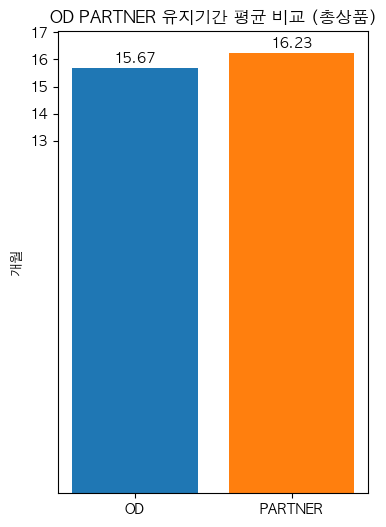

In [144]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'AppleGothic'

fig, ax = plt.subplots(figsize=(4, 6))

values = [od_retent, pt_retent]
labels = ['OD', 'PARTNER']

plt.bar(labels, values, color=['#1f77b4', '#ff7f0e'])

plt.title('OD PARTNER 유지기간 평균 비교 (총상품)')
plt.ylabel('개월')

y_values = [13,14,15,16,17]
y_labels = ['13','14','15','16','17']
plt.yticks(y_values, y_labels)

for i, v in enumerate(values):
    plt.text(i, v + 0.1, str(round(v,2)), ha='center', va='bottom')

plt.show()

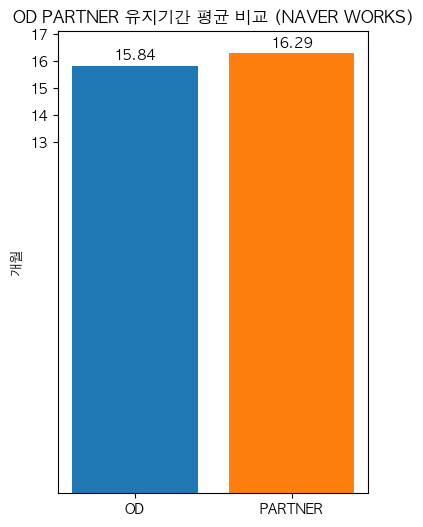

In [145]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'AppleGothic'

fig, ax = plt.subplots(figsize=(4, 6))

values = [od_works_retent, pt_works_retent]
labels = ['OD', 'PARTNER']

plt.bar(labels, values, color=['#1f77b4', '#ff7f0e'])

plt.title('OD PARTNER 유지기간 평균 비교 (NAVER WORKS)')
plt.ylabel('개월')

y_values = [13,14,15,16,17]
y_labels = ['13','14','15','16','17']
plt.yticks(y_values, y_labels)

for i, v in enumerate(values):
    plt.text(i, v + 0.1, str(round(v,2)), ha='center', va='bottom')

plt.show()

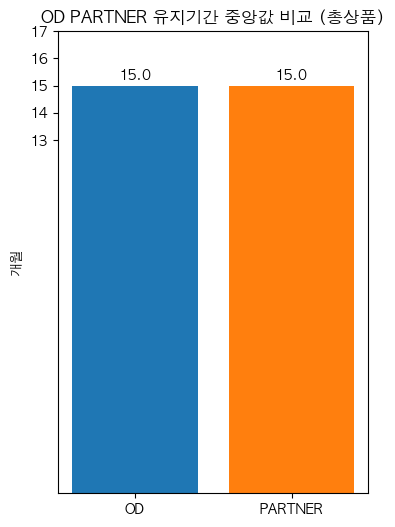

In [147]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'AppleGothic'

fig, ax = plt.subplots(figsize=(4, 6))

values = [od_retent2, pt_retent2]
labels = ['OD', 'PARTNER']

plt.bar(labels, values, color=['#1f77b4', '#ff7f0e'])

plt.title('OD PARTNER 유지기간 중앙값 비교 (총상품)')
plt.ylabel('개월')

y_values = [13,14,15,16,17]
y_labels = ['13','14','15','16','17']
plt.yticks(y_values, y_labels)

for i, v in enumerate(values):
    plt.text(i, v + 0.1, str(round(v,2)), ha='center', va='bottom')

plt.show()

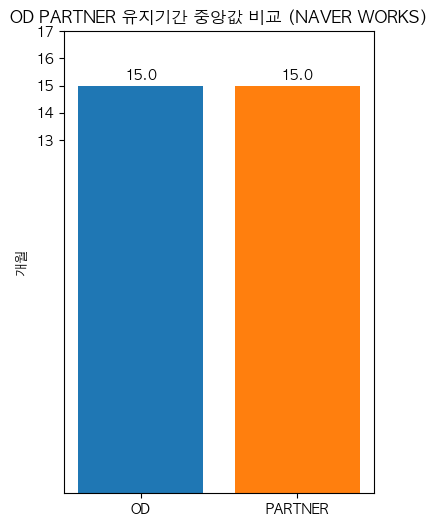

In [148]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'AppleGothic'

fig, ax = plt.subplots(figsize=(4, 6))

values = [od_works_retent2, pt_works_retent2]
labels = ['OD', 'PARTNER']

plt.bar(labels, values, color=['#1f77b4', '#ff7f0e'])

plt.title('OD PARTNER 유지기간 중앙값 비교 (NAVER WORKS)')
plt.ylabel('개월')

y_values = [13,14,15,16,17]
y_labels = ['13','14','15','16','17']
plt.yticks(y_values, y_labels)

for i, v in enumerate(values):
    plt.text(i, v + 0.1, str(round(v,2)), ha='center', va='bottom')

plt.show()

In [154]:
od_2409 = boa[-2][boa[-2]['채널']!='파트너 매출']
pt_2409 = boa[-2][boa[-2]['채널']=='파트너 매출']
od_works_2409 = od_2409[od_2409['구분3']=='NAVER WORKS']
pt_works_2409 = pt_2409[pt_2409['구분3']=='NAVER WORKS']

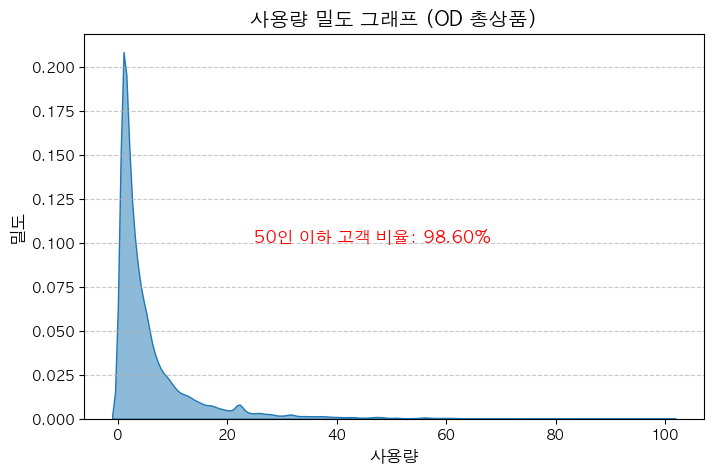

In [155]:
# 사용량 50 이하 비율 계산
total_customers = len(od_2409)
customers_below_50 = len(od_2409[od_2409['사용량'] <= 50])
customers_below_50_share = (customers_below_50 / total_customers) * 100

# KDE 밀도 그래프 생성
plt.figure(figsize=(8, 5))
sns.kdeplot(
    od_2409[od_2409['사용량'] <= 100]['사용량'],
    fill=True,
    bw_adjust=0.5,
    color='C0',  # 기본 색상 1번 (연한 블루)
    alpha=0.5
)

# 제목, 레이블 및 격자 추가
plt.title('사용량 밀도 그래프 (OD 총상품)', fontsize=14)
plt.xlabel('사용량', fontsize=12)
plt.ylabel('밀도', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 사용량 50 이하 비율 텍스트 추가
plt.text(
    25, 0.1,  # 그래프 내 적절한 위치를 지정
    f"50인 이하 고객 비율: {customers_below_50_share:.2f}%",
    fontsize=12,
    color='red'
)

# 그래프 출력
plt.show()


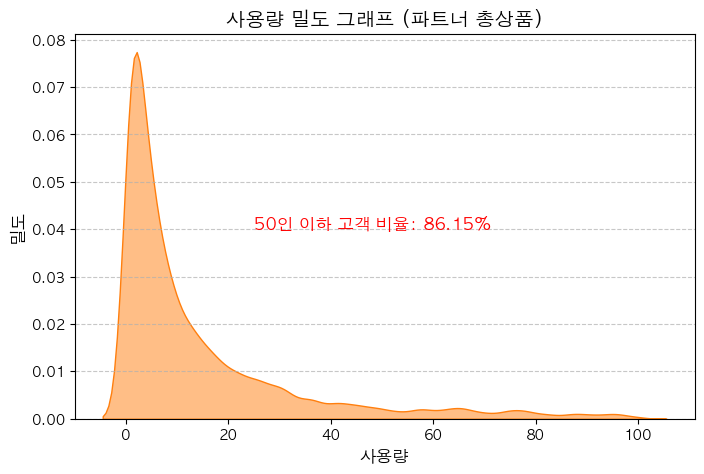

In [156]:
# 사용량 50 이하 비율 계산
total_customers = len(pt_2409)
customers_below_50 = len(pt_2409[pt_2409['사용량'] <= 50])
customers_below_50_share = (customers_below_50 / total_customers) * 100

# KDE 밀도 그래프 생성
plt.figure(figsize=(8, 5))
sns.kdeplot(
    pt_2409[pt_2409['사용량'] <= 100]['사용량'],
    fill=True,
    bw_adjust=0.5,
    color='C1',  # 기본 색상 2번 (오렌지색)
    alpha=0.5
)

# 제목, 레이블 및 격자 추가
plt.title('사용량 밀도 그래프 (파트너 총상품)', fontsize=14)
plt.xlabel('사용량', fontsize=12)
plt.ylabel('밀도', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 사용량 50 이하 비율 텍스트 추가
plt.text(
    25, 0.04,  # 그래프 내 적절한 위치를 지정
    f"50인 이하 고객 비율: {customers_below_50_share:.2f}%",
    fontsize=12,
    color='red'
)

# 그래프 출력
plt.show()


In [157]:
pt_2409

,회원번호,구분3,매출금액(당월),이용금액(당월),회원명,플랫폼,파트너명,채널,미터링,사용량
6,1084,NAVER WORKS,109799.632304,128100,주식회사 아이언트레인,민간,아이지니 주식회사,파트너 매출,32,17.0
16,1313,NAVER WORKS,47998.129639,56000,주식회사 모래노리 소프트,민간,캡클라우드 주식회사,파트너 매출,32,8.0
19,1352,NAVER WORKS,54000.000000,63000,(주)피벗게임즈,민간,주식회사 페이지원,파트너 매출,32,9.0
20,1404,NAVER WORKS,42197.361016,49230,(주)라르고소프트,민간,(주)웰데이타시스템,파트너 매출,32,7.0
22,1431,NAVER WORKS,323457.980757,419300,주식회사 플레이스5,민간,베스핀글로벌 주식회사,파트너 매출,32,60.0
...,...,...,...,...,...,...,...,...,...,...
30617,773714,NAVER WORKS,279000.000000,372000,주식회사 에이토즈,민간,패스트파이브(주),파트너 매출,32,31.0
30618,773714,WORKPLACE,83700.000000,124000,주식회사 에이토즈,민간,패스트파이브(주),파트너 매출,32,31.0
30621,815046,NAVER WORKS,589475.397521,786000,(주)파워토스,민간,디딤365 주식회사,파트너 매출,32,64.0
30622,815046,WORKPLACE,129324.602479,191600,(주)파워토스,민간,디딤365 주식회사,파트너 매출,32,64.0


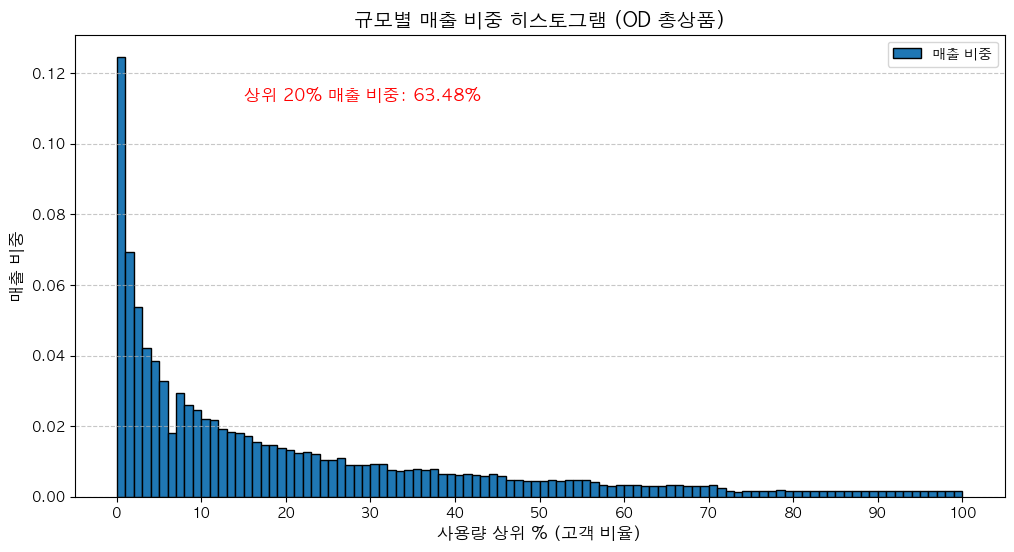

In [158]:
# 1. 사용량 기준으로 내림차순 정렬
od_2409 = od_2409.sort_values(by='사용량', ascending=False).reset_index(drop=True)

# 2. 상위 1% 단위로 구간 나누기
total_customers = len(od_2409)
percentiles = np.linspace(0, 100, 101)  # 0%부터 100%까지 1% 단위
bins = [int(total_customers * p / 100) for p in percentiles]

# 3. 각 구간별 매출 비중 계산
proportions = []
for i in range(1, len(bins)):
    start, end = bins[i - 1], bins[i]
    segment_revenue = od_2409.iloc[start:end]['매출금액(당월)'].sum()
    total_revenue = od_2409['매출금액(당월)'].sum()
    proportions.append(segment_revenue / total_revenue)

# 4. 상위 20% 이내 고객 매출 비중 계산
top_20_percent_revenue = sum(proportions[:20])
top_20_percent_share = top_20_percent_revenue * 100  # 백분율로 변환

# 5. 히스토그램 시각화
plt.figure(figsize=(12, 6))
plt.bar(
    percentiles[1:] - 0.5,  # X 좌표를 0.5칸 오른쪽으로 이동
    proportions,            # Y 좌표: 매출 비중
    width=1,                # 막대 폭
    edgecolor='black',
    align='center',
    color='C0',
    label='매출 비중'
)

# 범례 추가
plt.legend(loc='upper right')

# 상위 20% 매출 비중 텍스트 추가
plt.text(
    15, max(proportions) * 0.9,
    f"상위 20% 매출 비중: {top_20_percent_share:.2f}%",
    fontsize=12,
    color='red'
)

# 그래프 설정
plt.title('규모별 매출 비중 히스토그램 (OD 총상품)', fontsize=14)
plt.xlabel('사용량 상위 % (고객 비율)', fontsize=12)
plt.ylabel('매출 비중', fontsize=12)
plt.xticks(range(0, 101, 10))
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 그래프 출력
plt.show()

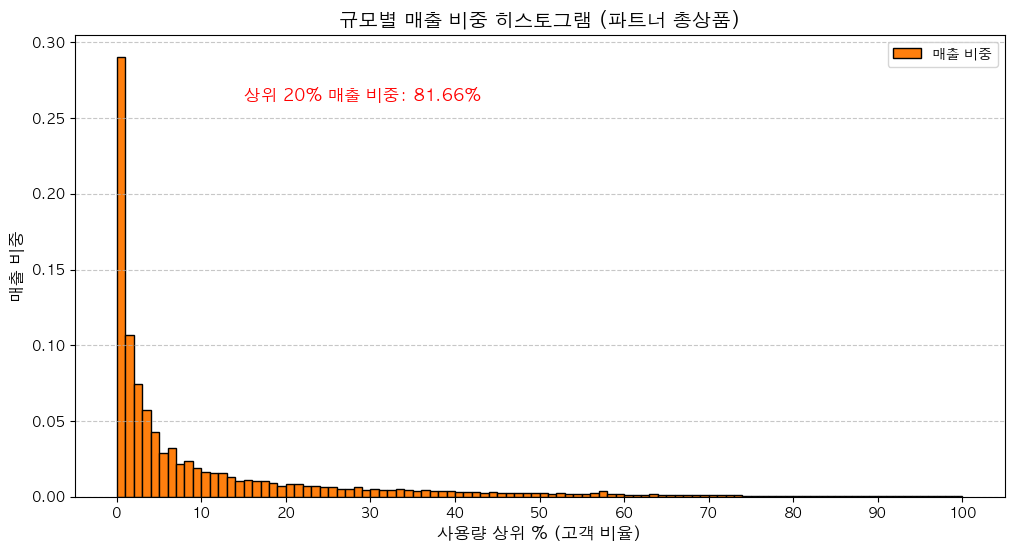

In [159]:
# 1. 사용량 기준으로 내림차순 정렬
pt_2409 = pt_2409.sort_values(by='사용량', ascending=False).reset_index(drop=True)

# 2. 상위 1% 단위로 구간 나누기
total_customers = len(pt_2409)
percentiles = np.linspace(0, 100, 101)  # 0%부터 100%까지 1% 단위
bins = [int(total_customers * p / 100) for p in percentiles]

# 3. 각 구간별 매출 비중 계산
proportions = []
for i in range(1, len(bins)):
    start, end = bins[i - 1], bins[i]
    segment_revenue = pt_2409.iloc[start:end]['매출금액(당월)'].sum()
    total_revenue = pt_2409['매출금액(당월)'].sum()
    proportions.append(segment_revenue / total_revenue)

# 4. 상위 20% 이내 고객 매출 비중 계산
top_20_percent_revenue = sum(proportions[:20])
top_20_percent_share = top_20_percent_revenue * 100  # 백분율로 변환

# 5. 히스토그램 시각화
plt.figure(figsize=(12, 6))
plt.bar(
    percentiles[1:] - 0.5,  # X 좌표를 0.5칸 오른쪽으로 이동
    proportions,            # Y 좌표: 매출 비중
    width=1,                # 막대 폭
    edgecolor='black',
    align='center',
    color='C1',             # matplotlib 기본 팔레트의 두 번째 색상 (오렌지)
    label='매출 비중'
)

# 범례 추가
plt.legend(loc='upper right')

# 상위 20% 매출 비중 텍스트 추가
plt.text(
    15, max(proportions) * 0.9,
    f"상위 20% 매출 비중: {top_20_percent_share:.2f}%",
    fontsize=12,
    color='red'
)

# 그래프 설정
plt.title('규모별 매출 비중 히스토그램 (파트너 총상품)', fontsize=14)
plt.xlabel('사용량 상위 % (고객 비율)', fontsize=12)
plt.ylabel('매출 비중', fontsize=12)
plt.xticks(range(0, 101, 10))
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 그래프 출력
plt.show()


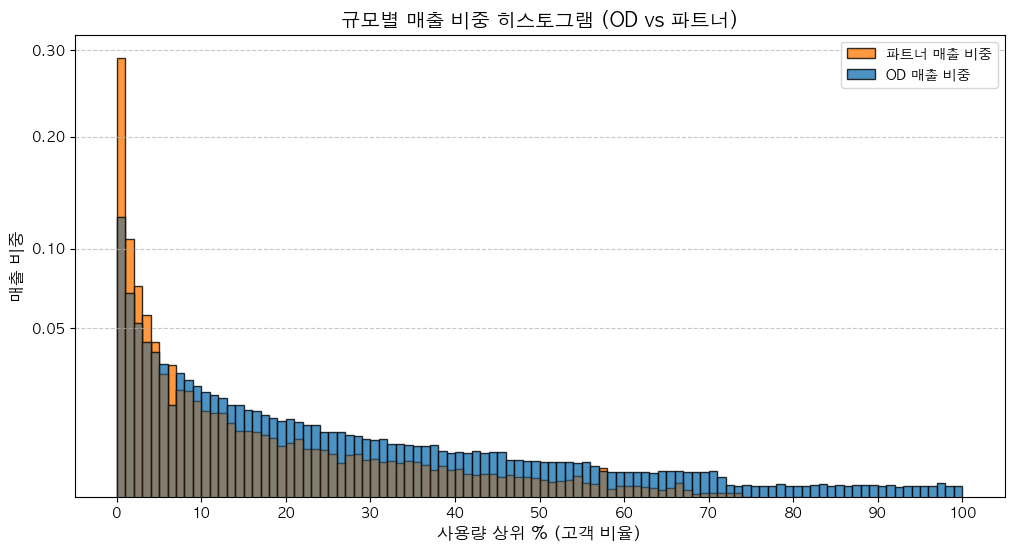

In [160]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

colors = ['C0' if od > pt else 'C1' for od, pt in zip(proportions_od, proportions_pt)]

# 1. OD 데이터 정리 및 계산
od_2409 = od_2409.sort_values(by='사용량', ascending=False).reset_index(drop=True)
total_customers_od = len(od_2409)
bins_od = [int(total_customers_od * p / 100) for p in np.linspace(0, 100, 101)]

proportions_od = []
total_revenue_od = od_2409['매출금액(당월)'].sum()
for i in range(1, len(bins_od)):
    start, end = bins_od[i - 1], bins_od[i]
    segment_revenue = od_2409.iloc[start:end]['매출금액(당월)'].sum()
    proportions_od.append(segment_revenue / total_revenue_od)
top_20_percent_share_od = sum(proportions_od[:20]) * 100

# 2. PT 데이터 정리 및 계산
pt_2409 = pt_2409.sort_values(by='사용량', ascending=False).reset_index(drop=True)
total_customers_pt = len(pt_2409)
bins_pt = [int(total_customers_pt * p / 100) for p in np.linspace(0, 100, 101)]

proportions_pt = []
total_revenue_pt = pt_2409['매출금액(당월)'].sum()
for i in range(1, len(bins_pt)):
    start, end = bins_pt[i - 1], bins_pt[i]
    segment_revenue = pt_2409.iloc[start:end]['매출금액(당월)'].sum()
    proportions_pt.append(segment_revenue / total_revenue_pt)
top_20_percent_share_pt = sum(proportions_pt[:20]) * 100

# 겹치는 영역 계산
overlap = np.minimum(proportions_od, proportions_pt)

# 히스토그램 시각화
plt.figure(figsize=(12, 6))

# PT 전체 영역
plt.bar(
    np.arange(0.5, 100.5),
    proportions_pt,
    width=1,
    edgecolor='black',
    color='C1',
    alpha=0.8,
    label='파트너 매출 비중'
)

# OD 전체 영역
plt.bar(
    np.arange(0.5, 100.5),
    proportions_od,
    width=1,
    edgecolor='black',
    color='C0',
    alpha=0.8,
    label='OD 매출 비중'
)

# 겹치는 영역
for i, (val, color) in enumerate(zip(overlap, colors)):
    plt.bar(
        i + 0.5,
        val,
        width=1,
        edgecolor='black',
        color='C1',
        alpha=0.3
    )

# y축 설정: 0.05 간격 강조 및 점차 좁게
ax = plt.gca()
ax.set_yscale('function', functions=(lambda x: x ** 0.5, lambda x: x ** 2))  # 제곱근 스케일
ax.yaxis.set_major_locator(ticker.FixedLocator([0.05, 0.1, 0.2, 0.3, 0.5, 0.7, 1.0]))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{x:.2f}"))

# 범례 추가
plt.legend(loc='upper right')

# 그래프 설정
plt.title('규모별 매출 비중 히스토그램 (OD vs 파트너)', fontsize=14)
plt.xlabel('사용량 상위 % (고객 비율)', fontsize=12)
plt.ylabel('매출 비중', fontsize=12)
plt.xticks(range(0, 101, 10))
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 그래프 출력
plt.show()


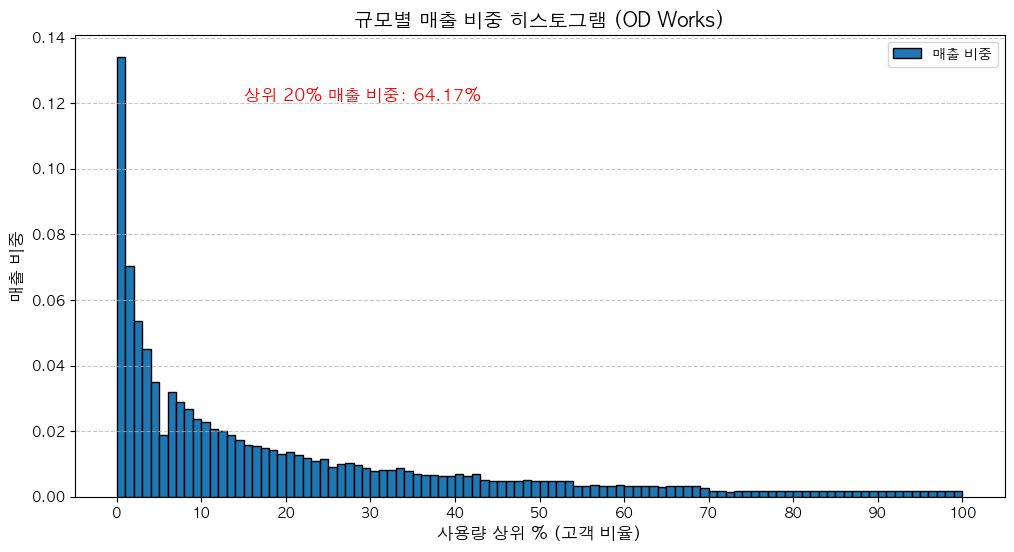

In [161]:
# 1. 사용량 기준으로 내림차순 정렬
od_works_2409 = od_works_2409.sort_values(by='사용량', ascending=False).reset_index(drop=True)

# 2. 상위 1% 단위로 구간 나누기
total_customers = len(od_works_2409)
percentiles = np.linspace(0, 100, 101)  # 0%부터 100%까지 1% 단위
bins = [int(total_customers * p / 100) for p in percentiles]

# 3. 각 구간별 매출 비중 계산
proportions = []
for i in range(1, len(bins)):
    start, end = bins[i - 1], bins[i]
    segment_revenue = od_works_2409.iloc[start:end]['매출금액(당월)'].sum()
    total_revenue = od_works_2409['매출금액(당월)'].sum()
    proportions.append(segment_revenue / total_revenue)

# 4. 상위 20% 이내 고객 매출 비중 계산
top_20_percent_revenue = sum(proportions[:20])
top_20_percent_share = top_20_percent_revenue * 100  # 백분율로 변환

# 5. 히스토그램 시각화
plt.figure(figsize=(12, 6))
plt.bar(
    percentiles[1:] - 0.5,  # X 좌표를 0.5칸 오른쪽으로 이동
    proportions,            # Y 좌표: 매출 비중
    width=1,                # 막대 폭
    edgecolor='black',
    align='center',
    color='C0',             # 기본 블루 색상
    label='매출 비중'
)

# 범례 추가
plt.legend(loc='upper right')

# 상위 20% 매출 비중 텍스트 추가
plt.text(
    15, max(proportions) * 0.9,
    f"상위 20% 매출 비중: {top_20_percent_share:.2f}%",
    fontsize=12,
    color='red'
)

# 그래프 설정
plt.title('규모별 매출 비중 히스토그램 (OD Works)', fontsize=14)
plt.xlabel('사용량 상위 % (고객 비율)', fontsize=12)
plt.ylabel('매출 비중', fontsize=12)
plt.xticks(range(0, 101, 10))
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 그래프 출력
plt.show()


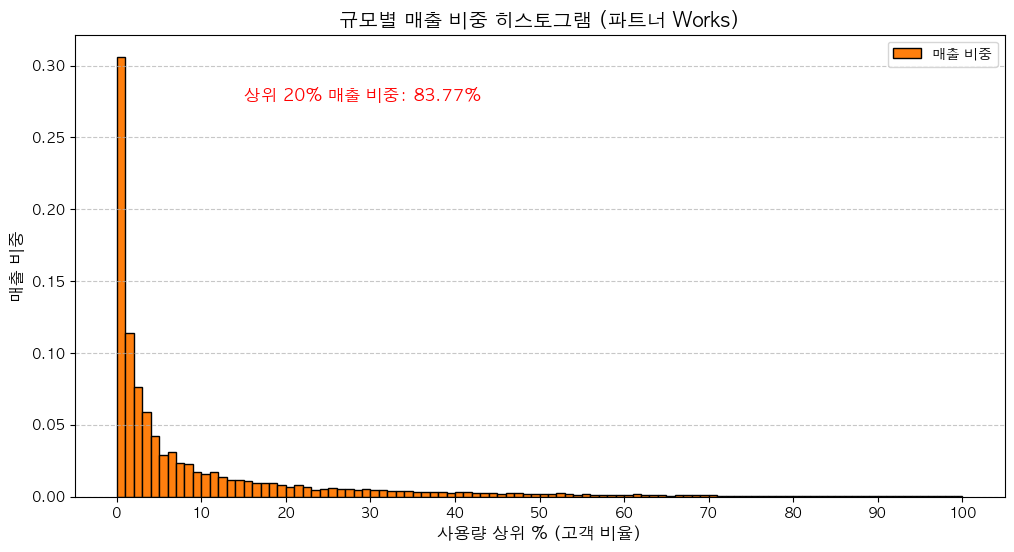

In [162]:
# 1. 사용량 기준으로 내림차순 정렬
pt_works_2409 = pt_works_2409.sort_values(by='사용량', ascending=False).reset_index(drop=True)

# 2. 상위 1% 단위로 구간 나누기
total_customers = len(pt_works_2409)
percentiles = np.linspace(0, 100, 101)  # 0%부터 100%까지 1% 단위
bins = [int(total_customers * p / 100) for p in percentiles]

# 3. 각 구간별 매출 비중 계산
proportions = []
for i in range(1, len(bins)):
    start, end = bins[i - 1], bins[i]
    segment_revenue = pt_works_2409.iloc[start:end]['매출금액(당월)'].sum()
    total_revenue = pt_works_2409['매출금액(당월)'].sum()
    proportions.append(segment_revenue / total_revenue)

# 4. 상위 20% 이내 고객 매출 비중 계산
top_20_percent_revenue = sum(proportions[:20])
top_20_percent_share = top_20_percent_revenue * 100  # 백분율로 변환

# 5. 히스토그램 시각화
plt.figure(figsize=(12, 6))
plt.bar(
    percentiles[1:] - 0.5,  # X 좌표를 0.5칸 오른쪽으로 이동
    proportions,            # Y 좌표: 매출 비중
    width=1,                # 막대 폭
    edgecolor='black',
    align='center',
    color='C1',             # 기본 오렌지 색상
    label='매출 비중'
)

# 범례 추가
plt.legend(loc='upper right')

# 상위 20% 매출 비중 텍스트 추가
plt.text(
    15, max(proportions) * 0.9,
    f"상위 20% 매출 비중: {top_20_percent_share:.2f}%",
    fontsize=12,
    color='red'
)

# 그래프 설정
plt.title('규모별 매출 비중 히스토그램 (파트너 Works)', fontsize=14)
plt.xlabel('사용량 상위 % (고객 비율)', fontsize=12)
plt.ylabel('매출 비중', fontsize=12)
plt.xticks(range(0, 101, 10))
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 그래프 출력
plt.show()


In [3]:
id = pd.read_excel('/Users/user/Documents/진행중 업무/odpt_id.xlsx',header=None)
od_1_1 = od_1[13:]
pt_1_1 = pt_1[13:]
od_2_1 = od_2[13:]
pt_2_1 = pt_2[13:]
id = id.drop(21, axis = 1)
od_1_1 = pd.DataFrame(od_1_1).T
pt_1_1 = pd.DataFrame(pt_1_1).T
od_2_1 = pd.DataFrame(od_2_1).T
pt_2_1 = pd.DataFrame(pt_2_1).T
id = pd.concat([id,od_1_1,pt_1_1,od_2_1,pt_2_1])
id = id.reset_index(drop=True)

NameError: name 'pd' is not defined

In [164]:
id.loc[6,:] = od_1_1.loc[0,:]/id.loc[0,:]
id.loc[7,:] = pt_1_1.loc[0,:]/id.loc[0,:]

In [166]:
arpu = id.copy()
arpu.index = ['OD Users','파트너 Users','OD 매출금액','파트너 매출금액','OD 이용금액','파트너 이용금액','OD ARPU','파트너 ARPU']
arpu.columns = pd.date_range(start='2023-02-01', end='2024-10-31', freq='MS').strftime('%Y년 %m월')

In [1]:
arpu = arpu.astype(int)
arpu

NameError: name 'arpu' is not defined

In [168]:
arpu.to_excel('/Users/user/Documents/진행중 업무/odpt_arpu.xlsx',index=True)

In [169]:
image_path = "/Users/user/Documents/업무문서/dataframe_image7.png"

# 함수 호출
save_dataframe_with_index_as_image(arpu, image_path)
print(f"DataFrame 이미지 저장 완료: {image_path}")

DataFrame 이미지 저장 완료: /Users/user/Documents/업무문서/dataframe_image7.png
